In [1]:
import numpy as np

# %pip install pandas
# https://stackoverflow.com/questions/62512095/sagemath-9-1-on-mac-install-numpy-pandas

import pandas as pd


In [2]:

'''Functions:'''

"""Description: We only want to process the voters that are in all rounds of data. Here we search to find who voted in each round and create a dictionary/indexing of 
those participants. We first return a list of names to be used to filter out which rows of the dataframe should be left.
We then give a dictionary in both index to name and name to index in order to switch back and forth later.
    Input: (List: list of dataframes for each round of voting containing the voters in their own column, string: name of the voters column)
    Output: (name list, name to index dictionary, index to name dictionary)
    """
def Voter_Intersection_Participation(list_of_dataframes, column_to_make_dict_of_string):
    # Instantiate Dictionaries
    name_index_dict = {}
    index_name_dict = {}
    
    # Determine how many loops are needed
    number_of_dataframes = len(list_of_dataframes)
    
    # Establish base intersection_array that will be updated
    intersection_array = list_of_dataframes[0][column_to_make_dict_of_string].sort_values()
    
    # Want to skip the first dataframe since it is the base case
    i = 1
    for i in range(number_of_dataframes):
        intersection_array = np.intersect1d(intersection_array, list_of_dataframes[i][column_to_make_dict_of_string],assume_unique=False,return_indices=False)
    
    # Create the dictionary with name keys and number values
    index = 0
    for name in intersection_array:
        name_index_dict[name] = index
        index += 1
    
    # Reverse the name_index_dict dictionary.
    for key in name_index_dict:
        index_name_dict[name_index_dict[key]] = key
    
    return list(name_index_dict.keys()), name_index_dict, index_name_dict

"""Description: This function takes in a dataframe that has format of the AP Polling Data from bakonydraco. We then input how we would like the 25 teams to be partitioned.
    This partition_list has length of the number of groups, and the ith entry gives the size of the ith group. This function is a step in processing the data into
    its desired form for comparison.
    Input: (pd.dataframe with ranked data, list of the group sizes of the partitioned rankings)
    Output: (pd.dataframe that has the corresponding partitioning)"""
def partition(dataframe, partition_list):
    
    # Determine the columns that are preloaded into the new dataframe
    data = {
        # 'Rank' : dataframe['Rank'],
        'Voter' : dataframe['Voter']
    }
    
    # Instantiate/preload the partitioned dataframe
    df = pd.DataFrame(data)
    
    # Skip the 'Name' Column in the data frame, start from column indexed 1 and not 0.
    start_index = 1 # Was 2 when we were including Rank
    
    # Establish numbering for the partition names
    naming_index = 1
    
    # Keep track of which index we are at while partitioning
    sum_index = 0
    
    # Scanning through old dataframe, add columns with partition index number name that has sizes according to what partition_list describes
    for part in partition_list: 
        sum_index += partition_list[naming_index -1]
        df['Partition ' + str(naming_index)] = dataframe.apply(lambda row: row[int(start_index):int(start_index)+int(partition_list[naming_index -1])].tolist(), axis=1)
        start_index += partition_list[naming_index -1]
        naming_index +=1
    return df

def adj_list_to_symmetric_matrix(adj_list, n):
    matrix = np.zeros((n,n))
    
    list_index = 0
    for i in range(n):
        for j in range(i+1,n):
            matrix[i,j] = int(adj_list[list_index])

            list_index += 1
    return matrix + matrix.T

In [3]:
'''Load Dictionary of Schools - Now Processed'''

# Used when before processing. Now just have it hard coded since it won't change.
# schools_csv_df = pd.read_csv('Schools Dictionary/Combined-All FCS_FBS Teams.csv')

# Used to copy down the reverse dictionary.
# nums_to_names_school_dict = {value: key for key, value in schools_dict.items()}
# print(nums_to_names_school_dict)
# count = 1
# string = ''
# for school in nums_to_names_school_dict:
#     string += str(school) + ': '
#     string += "'" + nums_to_names_school_dict[school] + "'," + ' '
#     if count%5 == 0 and count != 0:
#         print(string)
#         string = ''
#         count = 0
#     count += 1

schools_dict = {'Air Force': 0, 'Akron': 1, 'Alabama': 2, 'Appalachian State': 3, 'Arizona': 4, 
                'Arizona State': 5, 'Arkansas': 6, 'Arkansas State': 7, 'Army': 8, 'Auburn': 9, 
                'Ball State': 10, 'Baylor': 11, 'Boise State': 12, 'Boston College': 13, 'Bowling Green': 14, 
                'Buffalo': 15, 'BYU': 16, 'California': 17, 'Central Michigan': 18, 'Charlotte': 19, 
                'Cincinnati': 20, 'Clemson': 21, 'Coastal Carolina': 22, 'Colorado': 23, 'Colorado State': 24, 
                'Duke': 25, 'East Carolina': 26, 'Eastern Michigan': 27, 'Florida Atlantic': 28, 'FIU': 29, 
                'Florida': 30, 'Florida State': 31, 'Fresno State': 32, 'Georgia': 33, 'Georgia Southern': 34, 
                'Georgia State': 35, 'Georgia Tech': 36, 'Hawaii': 37, 'Houston': 38, 'Illinois': 39, 
                'Indiana': 40, 'Iowa': 41, 'Iowa State': 42, 'Jacksonville State': 43, 'James Madison': 44, 
                'Kansas': 45, 'Kansas State': 46, 'Kennesaw State': 47, 'Kent State': 48, 'Kentucky': 49, 
                'Liberty': 50, 'Louisiana': 51, 'Louisiana–Monroe[p]': 52, 'Louisiana Tech': 53, 'Louisville': 54, 
                'LSU': 55, 'Marshall': 56, 'Maryland': 57, 'Memphis': 58, 'Miami (FL)': 59, 
                'Miami (OH)': 60, 'Michigan': 61, 'Michigan State': 62, 'Middle Tennessee': 63, 'Minnesota': 64, 
                'Mississippi State': 65, 'Missouri': 66, 'Navy': 67, 'NC State': 68, 'Nebraska': 69, 
                'Nevada': 70, 'New Mexico': 71, 'New Mexico State': 72, 'North Carolina': 73, 'North Texas': 74, 
                'Northern Illinois': 75, 'Northwestern': 76, 'Notre Dame': 77, 'Ohio': 78, 'Ohio State': 79, 
                'Oklahoma': 80, 'Oklahoma State': 81, 'Old Dominion': 82, 'Ole Miss': 83, 'Oregon': 84, 
                'Oregon State': 85, 'Penn State': 86, 'Pittsburgh': 87, 'Purdue': 88, 'Rice': 89, 
                'Rutgers': 90, 'Sam Houston': 91, 'San Diego State': 92, 'San Jose State': 93, 'SMU': 94, 
                'South Alabama': 95, 'South Carolina': 96, 'South Florida': 97, 'Southern Miss': 98, 'Stanford': 99, 
                'Syracuse': 100, 'TCU': 101, 'Temple': 102, 'Tennessee': 103, 'Texas': 104, 
                'Texas A&M': 105, 'Texas State': 106, 'Texas Tech': 107, 'Toledo': 108, 'Troy': 109, 
                'Tulane': 110, 'Tulsa': 111, 'UAB': 112, 'UCF': 113, 'UCLA': 114, 
                'UConn': 115, 'UMass': 116, 'UNLV': 117, 'USC': 118, 'Utah': 119, 
                'Utah State': 120, 'UTEP': 121, 'UTSA': 122, 'Vanderbilt': 123, 'Virginia': 124, 
                'Virginia Tech': 125, 'Wake Forest': 126, 'Washington': 127, 'Washington State': 128, 'West Virginia': 129, 
                'Western Kentucky': 130, 'Western Michigan': 131, 'Wisconsin': 132, 'Wyoming': 133, 'Abilene Christian': 134, 
                'Alabama A&M': 135, 'Alabama State': 136, 'Albany': 137, 'Alcorn State': 138, 'Arkansas–Pine Bluff': 139, 
                'Austin Peay': 140, 'Bethune–Cookman': 141, 'Brown': 142, 'Bryant': 143, 'Bucknell': 144, 
                'Butler': 145, 'Cal Poly': 146, 'Campbell': 147, 'Central Arkansas': 148, 'Central Connecticut': 149, 
                'Charleston Southern': 150, 'Chattanooga': 151, 'The Citadel': 152, 'Colgate': 153, 'Columbia': 154, 
                'Cornell': 155, 'Dartmouth': 156, 'Davidson': 157, 'Dayton': 158, 'Delaware': 159, 
                'Delaware State': 160, 'Drake': 161, 'Duquesne': 162, 'East Tennessee State': 163, 'Eastern Illinois': 164, 
                'Eastern Kentucky': 165, 'Eastern Washington': 166, 'Elon': 167, 'Florida A&M': 168, 'Fordham': 169, 
                'Furman': 170, 'Gardner–Webb': 171, 'Georgetown': 172, 'Grambling State': 173, 'Hampton': 174, 
                'Harvard': 175, 'Holy Cross': 176, 'Houston Christian': 177, 'Howard': 178, 'Idaho': 179, 
                'Idaho State': 180, 'Illinois State': 181, 'Incarnate Word': 182, 'Indiana State': 183, 'Jackson State': 184, 
                'Lafayette': 185, 'Lamar': 186, 'Lehigh': 187, 'LIU[i]': 188, 'Maine': 189, 
                'Marist': 190, 'McNeese': 191, 'Mercer': 192, 'Merrimack': 193, 'Mississippi Valley State': 194, 
                'Missouri State': 195, 'Monmouth': 196, 'Montana': 197, 'Montana State': 198, 'Morehead State': 199, 
                'Morgan State': 200, 'Murray State': 201, 'New Hampshire': 202, 'Nicholls': 203, 'Norfolk State': 204, 
                'North Alabama': 205, 'North Carolina A&T': 206, 'North Carolina Central': 207, 'North Dakota': 208, 'North Dakota State': 209, 
                'Northern Arizona': 210, 'Northern Colorado': 211, 'Northern Iowa': 212, 'Northwestern State': 213, 'Penn': 214, 
                'Portland State': 215, 'Prairie View A&M': 216, 'Presbyterian': 217, 'Princeton': 218, 'Rhode Island': 219, 
                'Richmond': 220, 'Robert Morris': 221, 'Sacramento State': 222, 'Sacred Heart': 223, 'Saint Francis (PA)': 224, 
                'Samford': 225, 'San Diego': 226, 'South Carolina State': 227, 'South Dakota': 228, 'South Dakota State': 229, 
                'Southeast Missouri State': 230, 'Southeastern Louisiana': 231, 'Southern': 232, 'Southern Illinois': 233, 'Southern Utah': 234, 
                'Stephen F. Austin': 235, 'Stetson': 236, 'Stony Brook': 237, 'Tarleton': 238, 'Tennessee State': 239, 
                'Tennessee Tech': 240, 'Texas Southern': 241, 'Towson': 242, 'UC Davis': 243, 'UT Martin': 244, 
                'Utah Tech': 245, 'Valparaiso': 246, 'Villanova': 247, 'VMI': 248, 'Wagner': 249, 
                'Weber State': 250, 'Western Carolina': 251, 'Western Illinois': 252, 'William & Mary': 253, 'Wofford': 254, 
                'Yale': 255, 'Youngstown State': 256}

nums_to_names_school_dict = {0: 'Air Force', 1: 'Akron', 2: 'Alabama', 3: 'Appalachian State', 4: 'Arizona', 
                             5: 'Arizona State', 6: 'Arkansas', 7: 'Arkansas State', 8: 'Army', 9: 'Auburn', 
                             10: 'Ball State', 11: 'Baylor', 12: 'Boise State', 13: 'Boston College', 14: 'Bowling Green', 
                             15: 'Buffalo', 16: 'BYU', 17: 'California', 18: 'Central Michigan', 19: 'Charlotte', 
                             20: 'Cincinnati', 21: 'Clemson', 22: 'Coastal Carolina', 23: 'Colorado', 24: 'Colorado State', 
                             25: 'Duke', 26: 'East Carolina', 27: 'Eastern Michigan', 28: 'Florida Atlantic', 29: 'FIU', 
                             30: 'Florida', 31: 'Florida State', 32: 'Fresno State', 33: 'Georgia', 34: 'Georgia Southern', 
                             35: 'Georgia State', 36: 'Georgia Tech', 37: 'Hawaii', 38: 'Houston', 39: 'Illinois', 
                             40: 'Indiana', 41: 'Iowa', 42: 'Iowa State', 43: 'Jacksonville State', 44: 'James Madison', 
                             45: 'Kansas', 46: 'Kansas State', 47: 'Kennesaw State', 48: 'Kent State', 49: 'Kentucky', 
                             50: 'Liberty', 51: 'Louisiana', 52: 'Louisiana–Monroe[p]', 53: 'Louisiana Tech', 54: 'Louisville', 
                             55: 'LSU', 56: 'Marshall', 57: 'Maryland', 58: 'Memphis', 59: 'Miami (FL)', 
                             60: 'Miami (OH)', 61: 'Michigan', 62: 'Michigan State', 63: 'Middle Tennessee', 64: 'Minnesota', 
                             65: 'Mississippi State', 66: 'Missouri', 67: 'Navy', 68: 'NC State', 69: 'Nebraska', 
                             70: 'Nevada', 71: 'New Mexico', 72: 'New Mexico State', 73: 'North Carolina', 74: 'North Texas', 
                             75: 'Northern Illinois', 76: 'Northwestern', 77: 'Notre Dame', 78: 'Ohio', 79: 'Ohio State', 
                             80: 'Oklahoma', 81: 'Oklahoma State', 82: 'Old Dominion', 83: 'Ole Miss', 84: 'Oregon', 
                             85: 'Oregon State', 86: 'Penn State', 87: 'Pittsburgh', 88: 'Purdue', 89: 'Rice', 
                             90: 'Rutgers', 91: 'Sam Houston', 92: 'San Diego State', 93: 'San Jose State', 94: 'SMU', 
                             95: 'South Alabama', 96: 'South Carolina', 97: 'South Florida', 98: 'Southern Miss', 99: 'Stanford', 
                             100: 'Syracuse', 101: 'TCU', 102: 'Temple', 103: 'Tennessee', 104: 'Texas', 
                             105: 'Texas A&M', 106: 'Texas State', 107: 'Texas Tech', 108: 'Toledo', 109: 'Troy', 
                             110: 'Tulane', 111: 'Tulsa', 112: 'UAB', 113: 'UCF', 114: 'UCLA', 
                             115: 'UConn', 116: 'UMass', 117: 'UNLV', 118: 'USC', 119: 'Utah', 
                             120: 'Utah State', 121: 'UTEP', 122: 'UTSA', 123: 'Vanderbilt', 124: 'Virginia', 
                             125: 'Virginia Tech', 126: 'Wake Forest', 127: 'Washington', 128: 'Washington State', 129: 'West Virginia', 
                             130: 'Western Kentucky', 131: 'Western Michigan', 132: 'Wisconsin', 133: 'Wyoming', 134: 'Abilene Christian', 
                             135: 'Alabama A&M', 136: 'Alabama State', 137: 'Albany', 138: 'Alcorn State', 139: 'Arkansas–Pine Bluff', 
                             140: 'Austin Peay', 141: 'Bethune–Cookman', 142: 'Brown', 143: 'Bryant', 144: 'Bucknell', 
                             145: 'Butler', 146: 'Cal Poly', 147: 'Campbell', 148: 'Central Arkansas', 149: 'Central Connecticut', 
                             150: 'Charleston Southern', 151: 'Chattanooga', 152: 'The Citadel', 153: 'Colgate', 154: 'Columbia', 
                             155: 'Cornell', 156: 'Dartmouth', 157: 'Davidson', 158: 'Dayton', 159: 'Delaware', 
                             160: 'Delaware State', 161: 'Drake', 162: 'Duquesne', 163: 'East Tennessee State', 164: 'Eastern Illinois', 
                             165: 'Eastern Kentucky', 166: 'Eastern Washington', 167: 'Elon', 168: 'Florida A&M', 169: 'Fordham', 
                             170: 'Furman', 171: 'Gardner–Webb', 172: 'Georgetown', 173: 'Grambling State', 174: 'Hampton', 
                             175: 'Harvard', 176: 'Holy Cross', 177: 'Houston Christian', 178: 'Howard', 179: 'Idaho', 
                             180: 'Idaho State', 181: 'Illinois State', 182: 'Incarnate Word', 183: 'Indiana State', 184: 'Jackson State', 
                             185: 'Lafayette', 186: 'Lamar', 187: 'Lehigh', 188: 'LIU[i]', 189: 'Maine', 
                             190: 'Marist', 191: 'McNeese', 192: 'Mercer', 193: 'Merrimack', 194: 'Mississippi Valley State', 
                             195: 'Missouri State', 196: 'Monmouth', 197: 'Montana', 198: 'Montana State', 199: 'Morehead State', 
                             200: 'Morgan State', 201: 'Murray State', 202: 'New Hampshire', 203: 'Nicholls', 204: 'Norfolk State', 
                             205: 'North Alabama', 206: 'North Carolina A&T', 207: 'North Carolina Central', 208: 'North Dakota', 209: 'North Dakota State', 
                             210: 'Northern Arizona', 211: 'Northern Colorado', 212: 'Northern Iowa', 213: 'Northwestern State', 214: 'Penn', 
                             215: 'Portland State', 216: 'Prairie View A&M', 217: 'Presbyterian', 218: 'Princeton', 219: 'Rhode Island', 
                             220: 'Richmond', 221: 'Robert Morris', 222: 'Sacramento State', 223: 'Sacred Heart', 224: 'Saint Francis (PA)', 
                             225: 'Samford', 226: 'San Diego', 227: 'South Carolina State', 228: 'South Dakota', 229: 'South Dakota State', 
                             230: 'Southeast Missouri State', 231: 'Southeastern Louisiana', 232: 'Southern', 233: 'Southern Illinois', 234: 'Southern Utah', 
                             235: 'Stephen F. Austin', 236: 'Stetson', 237: 'Stony Brook', 238: 'Tarleton', 239: 'Tennessee State', 
                             240: 'Tennessee Tech', 241: 'Texas Southern', 242: 'Towson', 243: 'UC Davis', 244: 'UT Martin', 
                             245: 'Utah Tech', 246: 'Valparaiso', 247: 'Villanova', 248: 'VMI', 249: 'Wagner', 
                             250: 'Weber State', 251: 'Western Carolina', 252: 'Western Illinois', 253: 'William & Mary', 254: 'Wofford', 
                             255: 'Yale', 256: 'Youngstown State'}

In [4]:
# Needed to add int() to our integer values because when we run in Sage the underlying code interprets the characters as floats. I'm not sure at this time why this small mismatch occurs.

"""Description: Provided two dataframes with the the Voter, Partition 1, Partition 2, ... structure, we use the partition_list_of_intersection_sizes
argument to determine if two rows/voters agreed with each other. This is recorded as a 0,1 entry in a list. This function is a helper on the way to
constructing a standard graph, so we only do comparisons on the upper triangular entries as these are the unique pairings. We skip the diagonal entries
as they trivially agree with themselves.

Voter, Partition 1, Partition 2, ... structure with numeric team entries is anticipated. We supply two dataframes (corresponding to the same week)
to the function because we want a graph showing agreement over a specific week. The partition_list_used is the same argument that was used in the 
partition() function, and partition_list_of_intersection_sizes is the argument that determines what is sufficient for agreement.
be the same so that we compare voters.
    Input: (partitioned_dataframe_1, partitioned_dataframe_2, partition_list_used -- on both dataframes], partition_list_of_intersection_sizes -- for agreementß)
    Output: (List of 0,1 entries corresponding to the upper triangular comparisons of the two dataframes)
    """
def agreement_binary_list_for_undirected_graph(dataframe_with_categories_1, dataframe_with_categories_2, partition_list_used, partition_list_of_intersection_sizes):
    # Turn the partitioned dataframes into numpy arrays to loop through
    array_1 = dataframe_with_categories_1.to_numpy()
    array_2 = dataframe_with_categories_2.to_numpy()
    
    # Determine dimensions of data/number of voters and how many partitions made
    number_of_rows = int(array_1.shape[0])
    number_of_columns = int(array_1.shape[1])
    
    # Instantiate the indices that will loop through the rows and columns, respectively
    i = int(0)
    j = int(0)
    
    # Instantiate the list of 0,1 entries that list whether the two voters agreed or not
    intersection_binary_list = []
    
    # Iterate through the "main" voter that is being compared
    while i < number_of_rows:
        # Start iterating through all pairs, no need to do AB and BA since they are the same in an undirected graph. So only need upper triangular entries.
        j = i + 1
        
        # Iterate through the next voters
        while j < number_of_rows:
            intersection_list = []
            k = int(1) #Skip the Name columns in dataframe
            # print('\n', 'i=',i, 'j=',j, 'k=',k, '--- ik versus jk', '\n') # Helps track the indices: person i versus person j at partition k
            
            # Iterate through the partitions  
            while k < number_of_columns:
                

                # We want to intersect the top 4 teams (and teams 11-16); this is made up of the first a singular partition group. We only need to access array_1 and array_2.
                if k == 1 or k == 4:
                    intersection = np.intersect1d(array_1[i][k],array_2[j][k],assume_unique=True,return_indices=False)
                    intersection_list.append(len(intersection))
                    
                    # print('i,j,k', i,j,k, 'array 1:', array_1[i][k], 'array 2:', array_2[j][k]) # Helps track where the disagreement may be
                
                # We want to intersect the top 6 teams (and last 15 teams); this is made up of the first (last) 2 partition groups.
                if k == 2 or k == 5:
                    # Instantiate the 2 partition groups as a singular numpy array
                    two_consecutive_partitions_of_teams_array_1 = np.concatenate((array_1[i][k-1],array_1[i][k]))
                    two_consecutive_partitions_of_teams_array_2 = np.concatenate((array_2[j][k-1],array_2[j][k]))
                    intersection = np.intersect1d(two_consecutive_partitions_of_teams_array_1, two_consecutive_partitions_of_teams_array_2 ,assume_unique=True,return_indices=False) 
                    intersection_list.append(len(intersection))
                    
                    # print('i,j,k', i,j,k, 'array 1:', two_consecutive_partitions_of_teams_array_1, 'array 2:', two_consecutive_partitions_of_teams_array_2) # Helps track where the disagreement may be
                    
                # We want to intersect the top 10 teams; this is made up of the first 3 partition groups.
                if k == 3:
                    # Instantiate the 3 partition groups as a singular numpy array
                    three_consecutive_partitions_of_teams_array_1 = np.concatenate((array_1[i][k-2],array_1[i][k-1],array_1[i][k]))
                    three_consecutive_partitions_of_teams_array_2 = np.concatenate((array_2[j][k-2],array_2[j][k-1],array_2[i][k]))
                    intersection = np.intersect1d(three_consecutive_partitions_of_teams_array_1, three_consecutive_partitions_of_teams_array_2, assume_unique=True,return_indices=False) 
                    intersection_list.append(len(intersection))
                    
                    # print('i,j,k', i,j,k, 'array 1:', three_consecutive_partitions_of_teams_array_1, 'array 2:',three_consecutive_partitions_of_teams_array_2) # Helps track where the disagreement may be
                
                # k-1 so because k iterates through the dataframe columns while partition list starts from index 0 
                if int(len(intersection)) < int( partition_list_of_intersection_sizes[k-1] ):
                    intersection_binary_list.append(0)
                    break
                
                k += 1
                # print('intersection list:', intersection_list)
            
            if k == number_of_columns:
                intersection_binary_list.append(1)
            
            j+=1
        # print('intersection binary list and length:', intersection_binary_list, '\n', len(intersection_binary_list)) # Gives 0,1 entries for person i against the rest
        i += 1
    return intersection_binary_list

"""Description: Helper function that takes in the 0,1 List and turns it into a matrix and Sage graph object. Since this is written from the 
agreement graph, we are expecting a 0,1 list corresponding to the upper triangular entries of the produced matrix.
    Input: (0,1 List of upper triangular entries, dimensions of square matrix - ie the number of voters)
    Output: (Sage Math Graph Object, Sage Math Matrix)
    """
def agreement_graph_matrix(adjacency_list_for_graph, square_dimension):
    # Initialize the matrix to be filled in
    graph_matrix = np.zeros((square_dimension, square_dimension))
    
    # Load the 0,1 entries into the proper indices of the adjacency matrix
    list_index = 0
    for i in range(square_dimension):
        for j in range(i+1,square_dimension):
            graph_matrix[i,j] = int(adjacency_list_for_graph[list_index])

            list_index += 1
            
    # The simple graph adjacency matrix is symmetric
    graph_matrix = graph_matrix + graph_matrix.T
    
    # Turn all entries into integers (type), required for a Sage matrix
    graph_matrix = graph_matrix.astype(int)
    
    # Create Sage matrix and graph objects
    sage_matrix = matrix(graph_matrix)
    sage_graph = Graph(sage_matrix)
    
    return (sage_graph, sage_matrix)

In [ ]:

"""In the future, we will write a for loop to iterate through the list of files/dataframes. Each block will loop through the list.

    This cell is used for processing the data into the format we want/care about. We read the file, remove unnecessary data columns, remove voters not in all weeks of data, 
    index voters, partition the voting 1-25 numbers into desired partition, use that partition to evaluate agreement, take agreement data and create a graph relating all voters."""

# Year
# 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 

'''Load all 16 CSV Files, one for each week of the season that is submitted.'''

appoll_2021_preseason = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Preseason.csv') #
appoll_2021_week_2 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_2.csv')
appoll_2021_week_3 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_3.csv')
appoll_2021_week_4 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_4.csv')
appoll_2021_week_5 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_5.csv')
appoll_2021_week_6 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_6.csv')
appoll_2021_week_7 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_7.csv')
appoll_2021_week_8 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_8.csv')
appoll_2021_week_9 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_9.csv')
appoll_2021_week_10 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_10.csv')
appoll_2021_week_11 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_11.csv')
appoll_2021_week_12 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_12.csv')
appoll_2021_week_13 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_13.csv')
appoll_2021_week_14 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_14.csv')
appoll_2021_week_15 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Week_15.csv')
appoll_2021_final = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2021_AP_Poll/AP_Poll_2021_Final.csv')

'''
Now we clean up and select only the columns that we want to analyze and keep.
We do so by copying the original table so as not to alter it.
'''
# Remove the Columns that are not needed in our analysis...for now. - Rank is NOT the Voter Index
keep_columns = ['Voter', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

appoll_2021_preseason_reduced_cols = appoll_2021_preseason[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_2_reduced_cols = appoll_2021_week_2[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_3_reduced_cols = appoll_2021_week_3[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_4_reduced_cols = appoll_2021_week_4[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_5_reduced_cols = appoll_2021_week_5[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_6_reduced_cols = appoll_2021_week_6[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_7_reduced_cols = appoll_2021_week_7[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_8_reduced_cols = appoll_2021_week_8[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_9_reduced_cols = appoll_2021_week_9[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_10_reduced_cols = appoll_2021_week_10[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_11_reduced_cols = appoll_2021_week_11[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_12_reduced_cols = appoll_2021_week_12[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_13_reduced_cols = appoll_2021_week_13[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_14_reduced_cols = appoll_2021_week_14[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_15_reduced_cols = appoll_2021_week_15[keep_columns].sort_values(by='Voter').copy()
appoll_2021_week_final_reduced_cols = appoll_2021_final[keep_columns].sort_values(by='Voter').copy()


# We only want to consider the voters that participated through the entire season/process. This generates that intersection list along with indexed dictionaries.
voter_participation = Voter_Intersection_Participation([appoll_2021_preseason,
                                  appoll_2021_week_2, appoll_2021_week_3, appoll_2021_week_4, appoll_2021_week_5, appoll_2021_week_6, 
                                  appoll_2021_week_7, appoll_2021_week_8, appoll_2021_week_9, appoll_2021_week_10, 
                                  appoll_2021_week_11, appoll_2021_week_12, appoll_2021_week_13, appoll_2021_week_14, appoll_2021_week_15, appoll_2021_final],
                                 'Voter')
print(len(voter_participation[0]))
print(voter_participation[0])
print(voter_participation[1])
print(voter_participation[2])

# Remove the rows of Voters that are not present in each week of the season. Inner [] gives series of True False, Outer [] compares to rows to keep.
appoll_2021_preseason_reduced_cols = appoll_2021_preseason_reduced_cols[appoll_2021_preseason_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_2_reduced_cols = appoll_2021_week_2_reduced_cols[appoll_2021_week_2_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_3_reduced_cols = appoll_2021_week_3_reduced_cols[appoll_2021_week_3_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_4_reduced_cols = appoll_2021_week_4_reduced_cols[appoll_2021_week_4_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_5_reduced_cols = appoll_2021_week_5_reduced_cols[appoll_2021_week_5_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_6_reduced_cols = appoll_2021_week_6_reduced_cols[appoll_2021_week_6_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_7_reduced_cols = appoll_2021_week_7_reduced_cols[appoll_2021_week_7_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_8_reduced_cols = appoll_2021_week_8_reduced_cols[appoll_2021_week_8_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_9_reduced_cols = appoll_2021_week_9_reduced_cols[appoll_2021_week_9_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_10_reduced_cols = appoll_2021_week_10_reduced_cols[appoll_2021_week_10_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_11_reduced_cols = appoll_2021_week_11_reduced_cols[appoll_2021_week_11_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_12_reduced_cols = appoll_2021_week_12_reduced_cols[appoll_2021_week_12_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_13_reduced_cols = appoll_2021_week_13_reduced_cols[appoll_2021_week_13_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_14_reduced_cols = appoll_2021_week_14_reduced_cols[appoll_2021_week_14_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_15_reduced_cols = appoll_2021_week_15_reduced_cols[appoll_2021_week_15_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2021_week_final_reduced_cols = appoll_2021_week_final_reduced_cols[appoll_2021_week_final_reduced_cols['Voter'].isin(voter_participation[0])]

# Reset the index so that it matches with that of the name_index_dict.
appoll_2021_preseason_reduced_cols = appoll_2021_preseason_reduced_cols.reset_index(drop=True)
appoll_2021_week_2_reduced_cols = appoll_2021_week_2_reduced_cols.reset_index(drop=True)
appoll_2021_week_3_reduced_cols = appoll_2021_week_3_reduced_cols.reset_index(drop=True)
appoll_2021_week_4_reduced_cols = appoll_2021_week_4_reduced_cols.reset_index(drop=True)
appoll_2021_week_5_reduced_cols = appoll_2021_week_5_reduced_cols.reset_index(drop=True)
appoll_2021_week_6_reduced_cols = appoll_2021_week_6_reduced_cols.reset_index(drop=True)
appoll_2021_week_7_reduced_cols = appoll_2021_week_7_reduced_cols.reset_index(drop=True)
appoll_2021_week_8_reduced_cols = appoll_2021_week_8_reduced_cols.reset_index(drop=True)
appoll_2021_week_9_reduced_cols = appoll_2021_week_9_reduced_cols.reset_index(drop=True)
appoll_2021_week_10_reduced_cols = appoll_2021_week_10_reduced_cols.reset_index(drop=True)
appoll_2021_week_11_reduced_cols = appoll_2021_week_11_reduced_cols.reset_index(drop=True)
appoll_2021_week_12_reduced_cols = appoll_2021_week_12_reduced_cols.reset_index(drop=True)
appoll_2021_week_13_reduced_cols = appoll_2021_week_13_reduced_cols.reset_index(drop=True)
appoll_2021_week_14_reduced_cols = appoll_2021_week_14_reduced_cols.reset_index(drop=True)
appoll_2021_week_15_reduced_cols = appoll_2021_week_15_reduced_cols.reset_index(drop=True)
appoll_2021_week_final_reduced_cols = appoll_2021_week_final_reduced_cols.reset_index(drop=True)

# Change the team names for the number so that less comparison has to be done.
appoll_2021_week_final_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_2_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_3_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_4_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_5_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_6_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_7_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_8_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_9_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_10_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_11_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_12_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_13_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_14_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_15_reduced_cols.replace(schools_dict, inplace=True)
appoll_2021_week_final_reduced_cols.replace(schools_dict, inplace=True)

# Partition the teams into their respective parts.
appoll_2021_preseason_reduced_cols_partitioned = partition(appoll_2021_preseason_reduced_cols, [4,2,4,6,9])
appoll_2021_week_2_reduced_cols_partitioned = partition(appoll_2021_week_2_reduced_cols, [4,2,4,6,9])
appoll_2021_week_3_reduced_cols_partitioned = partition(appoll_2021_week_3_reduced_cols, [4,2,4,6,9])
appoll_2021_week_4_reduced_cols_partitioned = partition(appoll_2021_week_4_reduced_cols, [4,2,4,6,9])
appoll_2021_week_5_reduced_cols_partitioned = partition(appoll_2021_week_5_reduced_cols, [4,2,4,6,9])
appoll_2021_week_6_reduced_cols_partitioned = partition(appoll_2021_week_6_reduced_cols, [4,2,4,6,9])
appoll_2021_week_7_reduced_cols_partitioned = partition(appoll_2021_week_7_reduced_cols, [4,2,4,6,9])
appoll_2021_week_8_reduced_cols_partitioned = partition(appoll_2021_week_8_reduced_cols, [4,2,4,6,9])
appoll_2021_week_9_reduced_cols_partitioned = partition(appoll_2021_week_9_reduced_cols, [4,2,4,6,9])
appoll_2021_week_10_reduced_cols_partitioned = partition(appoll_2021_week_10_reduced_cols, [4,2,4,6,9])
appoll_2021_week_11_reduced_cols_partitioned = partition(appoll_2021_week_11_reduced_cols, [4,2,4,6,9])
appoll_2021_week_12_reduced_cols_partitioned = partition(appoll_2021_week_12_reduced_cols, [4,2,4,6,9])
appoll_2021_week_13_reduced_cols_partitioned = partition(appoll_2021_week_13_reduced_cols, [4,2,4,6,9])
appoll_2021_week_14_reduced_cols_partitioned = partition(appoll_2021_week_14_reduced_cols, [4,2,4,6,9])
appoll_2021_week_15_reduced_cols_partitioned = partition(appoll_2021_week_15_reduced_cols, [4,2,4,6,9])
appoll_2021_week_final_reduced_cols_partitioned = partition(appoll_2021_week_final_reduced_cols, [4,2,4,6,9])

# Agreement Lists
AP_Poll_2021_Preseason_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_preseason_reduced_cols_partitioned,appoll_2021_preseason_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_2_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_2_reduced_cols_partitioned,appoll_2021_week_2_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_3_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_3_reduced_cols_partitioned,appoll_2021_week_3_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_4_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_4_reduced_cols_partitioned,appoll_2021_week_4_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_5_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_5_reduced_cols_partitioned,appoll_2021_week_5_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_6_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_6_reduced_cols_partitioned,appoll_2021_week_6_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_7_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_7_reduced_cols_partitioned,appoll_2021_week_7_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_8_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_8_reduced_cols_partitioned,appoll_2021_week_8_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_9_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_9_reduced_cols_partitioned,appoll_2021_week_9_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_10_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_10_reduced_cols_partitioned,appoll_2021_week_10_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_11_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_11_reduced_cols_partitioned,appoll_2021_week_11_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_12_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_12_reduced_cols_partitioned,appoll_2021_week_12_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_13_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_13_reduced_cols_partitioned,appoll_2021_week_13_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_14_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_14_reduced_cols_partitioned,appoll_2021_week_14_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Week_15_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_15_reduced_cols_partitioned,appoll_2021_week_15_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2021_Final_Agreement = agreement_binary_list_for_undirected_graph(appoll_2021_week_final_reduced_cols_partitioned,appoll_2021_week_final_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])

# Agreement Graphs and Matrices
# agreement_graph, agreement_matrix = agreement_graph_matrix(test_agreement, 59)

AP_Poll_2021_Preseason_agreement_graph, AP_Poll_2021_Preseason_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Preseason_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_2_agreement_graph, AP_Poll_2021_Week_2_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_2_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_3_agreement_graph, AP_Poll_2021_Week_3_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_3_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_4_agreement_graph, AP_Poll_2021_Week_4_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_4_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_5_agreement_graph, AP_Poll_2021_Week_5_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_5_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_6_agreement_graph, AP_Poll_2021_Week_6_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_6_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_7_agreement_graph, AP_Poll_2021_Week_7_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_7_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_8_agreement_graph, AP_Poll_2021_Week_8_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_8_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_9_agreement_graph, AP_Poll_2021_Week_9_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_9_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_10_agreement_graph, AP_Poll_2021_Week_10_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_10_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_11_agreement_graph, AP_Poll_2021_Week_11_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_11_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_12_agreement_graph, AP_Poll_2021_Week_12_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_12_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_13_agreement_graph, AP_Poll_2021_Week_13_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_13_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_14_agreement_graph, AP_Poll_2021_Week_14_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_14_Agreement,len(voter_participation[0]))
AP_Poll_2021_Week_15_agreement_graph, AP_Poll_2021_Week_15_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Week_15_Agreement,len(voter_participation[0]))
AP_Poll_2021_Final_agreement_graph, AP_Poll_2021_Final_agreement_matrix = agreement_graph_matrix(AP_Poll_2021_Final_Agreement,len(voter_participation[0]))


# Year
# 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022


'''Load all 16 CSV Files, one for each week of the season that is submitted.'''

appoll_2022_preseason = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Preseason.csv') 
appoll_2022_week_2 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_2.csv')
appoll_2022_week_3 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_3.csv')
appoll_2022_week_4 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_4.csv')
appoll_2022_week_5 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_5.csv')
appoll_2022_week_6 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_6.csv')
appoll_2022_week_7 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_7.csv')
appoll_2022_week_8 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_8.csv')
appoll_2022_week_9 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_9.csv')
appoll_2022_week_10 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_10.csv')
appoll_2022_week_11 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_11.csv')
appoll_2022_week_12 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_12.csv')
appoll_2022_week_13 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_13.csv')
appoll_2022_week_14 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_14.csv')
appoll_2022_week_15 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Week_15.csv')
appoll_2022_final = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2022_AP_Poll/AP_Poll_2022_Final.csv')


"""We need to write a function that does all the below. Each block is it's own for loop through the list of files/dataframes..."""

'''
Now we clean up and select only the columns that we want to analyze and keep.
We do so by copying the original table so as not to alter it.
'''
# Remove the Columns that are not needed in our analysis...for now. - Rank is NOT the Voter Index
keep_columns = ['Voter', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

appoll_2022_preseason_reduced_cols = appoll_2022_preseason[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_2_reduced_cols = appoll_2022_week_2[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_3_reduced_cols = appoll_2022_week_3[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_4_reduced_cols = appoll_2022_week_4[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_5_reduced_cols = appoll_2022_week_5[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_6_reduced_cols = appoll_2022_week_6[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_7_reduced_cols = appoll_2022_week_7[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_8_reduced_cols = appoll_2022_week_8[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_9_reduced_cols = appoll_2022_week_9[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_10_reduced_cols = appoll_2022_week_10[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_11_reduced_cols = appoll_2022_week_11[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_12_reduced_cols = appoll_2022_week_12[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_13_reduced_cols = appoll_2022_week_13[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_14_reduced_cols = appoll_2022_week_14[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_15_reduced_cols = appoll_2022_week_15[keep_columns].sort_values(by='Voter').copy()
appoll_2022_week_final_reduced_cols = appoll_2022_final[keep_columns].sort_values(by='Voter').copy()


# We only want to consider the voters that participated through the entire season/process. This generates that intersection list along with indexed dictionaries.
voter_participation = Voter_Intersection_Participation([appoll_2022_preseason,
                                  appoll_2022_week_2, appoll_2022_week_3, appoll_2022_week_4, appoll_2022_week_5, appoll_2022_week_6, 
                                  appoll_2022_week_7, appoll_2022_week_8, appoll_2022_week_9, appoll_2022_week_10, 
                                  appoll_2022_week_11, appoll_2022_week_12, appoll_2022_week_13, appoll_2022_week_14, appoll_2022_week_15, appoll_2022_final],
                                 'Voter')
print(len(voter_participation[0]))
print(voter_participation[0])
print(voter_participation[1])
print(voter_participation[2])

# Remove the rows of Voters that are not present in each week of the season. Inner [] gives series of True False, Outer [] compares to rows to keep.
appoll_2022_preseason_reduced_cols = appoll_2022_preseason_reduced_cols[appoll_2022_preseason_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_2_reduced_cols = appoll_2022_week_2_reduced_cols[appoll_2022_week_2_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_3_reduced_cols = appoll_2022_week_3_reduced_cols[appoll_2022_week_3_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_4_reduced_cols = appoll_2022_week_4_reduced_cols[appoll_2022_week_4_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_5_reduced_cols = appoll_2022_week_5_reduced_cols[appoll_2022_week_5_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_6_reduced_cols = appoll_2022_week_6_reduced_cols[appoll_2022_week_6_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_7_reduced_cols = appoll_2022_week_7_reduced_cols[appoll_2022_week_7_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_8_reduced_cols = appoll_2022_week_8_reduced_cols[appoll_2022_week_8_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_9_reduced_cols = appoll_2022_week_9_reduced_cols[appoll_2022_week_9_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_10_reduced_cols = appoll_2022_week_10_reduced_cols[appoll_2022_week_10_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_11_reduced_cols = appoll_2022_week_11_reduced_cols[appoll_2022_week_11_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_12_reduced_cols = appoll_2022_week_12_reduced_cols[appoll_2022_week_12_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_13_reduced_cols = appoll_2022_week_13_reduced_cols[appoll_2022_week_13_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_14_reduced_cols = appoll_2022_week_14_reduced_cols[appoll_2022_week_14_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_15_reduced_cols = appoll_2022_week_15_reduced_cols[appoll_2022_week_15_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2022_week_final_reduced_cols = appoll_2022_week_final_reduced_cols[appoll_2022_week_final_reduced_cols['Voter'].isin(voter_participation[0])]

# Reset the index so that it matches with that of the name_index_dict.
appoll_2022_preseason_reduced_cols = appoll_2022_preseason_reduced_cols.reset_index(drop=True)
appoll_2022_week_2_reduced_cols = appoll_2022_week_2_reduced_cols.reset_index(drop=True)
appoll_2022_week_3_reduced_cols = appoll_2022_week_3_reduced_cols.reset_index(drop=True)
appoll_2022_week_4_reduced_cols = appoll_2022_week_4_reduced_cols.reset_index(drop=True)
appoll_2022_week_5_reduced_cols = appoll_2022_week_5_reduced_cols.reset_index(drop=True)
appoll_2022_week_6_reduced_cols = appoll_2022_week_6_reduced_cols.reset_index(drop=True)
appoll_2022_week_7_reduced_cols = appoll_2022_week_7_reduced_cols.reset_index(drop=True)
appoll_2022_week_8_reduced_cols = appoll_2022_week_8_reduced_cols.reset_index(drop=True)
appoll_2022_week_9_reduced_cols = appoll_2022_week_9_reduced_cols.reset_index(drop=True)
appoll_2022_week_10_reduced_cols = appoll_2022_week_10_reduced_cols.reset_index(drop=True)
appoll_2022_week_11_reduced_cols = appoll_2022_week_11_reduced_cols.reset_index(drop=True)
appoll_2022_week_12_reduced_cols = appoll_2022_week_12_reduced_cols.reset_index(drop=True)
appoll_2022_week_13_reduced_cols = appoll_2022_week_13_reduced_cols.reset_index(drop=True)
appoll_2022_week_14_reduced_cols = appoll_2022_week_14_reduced_cols.reset_index(drop=True)
appoll_2022_week_15_reduced_cols = appoll_2022_week_15_reduced_cols.reset_index(drop=True)
appoll_2022_week_final_reduced_cols = appoll_2022_week_final_reduced_cols.reset_index(drop=True)

# Change the team names for the number so that less comparison has to be done.
appoll_2022_week_final_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_2_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_3_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_4_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_5_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_6_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_7_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_8_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_9_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_10_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_11_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_12_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_13_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_14_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_15_reduced_cols.replace(schools_dict, inplace=True)
appoll_2022_week_final_reduced_cols.replace(schools_dict, inplace=True)

# Partition the teams into their respective parts.
appoll_2022_preseason_reduced_cols_partitioned = partition(appoll_2022_preseason_reduced_cols, [4,2,4,6,9])
appoll_2022_week_2_reduced_cols_partitioned = partition(appoll_2022_week_2_reduced_cols, [4,2,4,6,9])
appoll_2022_week_3_reduced_cols_partitioned = partition(appoll_2022_week_3_reduced_cols, [4,2,4,6,9])
appoll_2022_week_4_reduced_cols_partitioned = partition(appoll_2022_week_4_reduced_cols, [4,2,4,6,9])
appoll_2022_week_5_reduced_cols_partitioned = partition(appoll_2022_week_5_reduced_cols, [4,2,4,6,9])
appoll_2022_week_6_reduced_cols_partitioned = partition(appoll_2022_week_6_reduced_cols, [4,2,4,6,9])
appoll_2022_week_7_reduced_cols_partitioned = partition(appoll_2022_week_7_reduced_cols, [4,2,4,6,9])
appoll_2022_week_8_reduced_cols_partitioned = partition(appoll_2022_week_8_reduced_cols, [4,2,4,6,9])
appoll_2022_week_9_reduced_cols_partitioned = partition(appoll_2022_week_9_reduced_cols, [4,2,4,6,9])
appoll_2022_week_10_reduced_cols_partitioned = partition(appoll_2022_week_10_reduced_cols, [4,2,4,6,9])
appoll_2022_week_11_reduced_cols_partitioned = partition(appoll_2022_week_11_reduced_cols, [4,2,4,6,9])
appoll_2022_week_12_reduced_cols_partitioned = partition(appoll_2022_week_12_reduced_cols, [4,2,4,6,9])
appoll_2022_week_13_reduced_cols_partitioned = partition(appoll_2022_week_13_reduced_cols, [4,2,4,6,9])
appoll_2022_week_14_reduced_cols_partitioned = partition(appoll_2022_week_14_reduced_cols, [4,2,4,6,9])
appoll_2022_week_15_reduced_cols_partitioned = partition(appoll_2022_week_15_reduced_cols, [4,2,4,6,9])
appoll_2022_week_final_reduced_cols_partitioned = partition(appoll_2022_week_final_reduced_cols, [4,2,4,6,9])

# Agreement Lists
AP_Poll_2022_Preseason_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_preseason_reduced_cols_partitioned,appoll_2022_preseason_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_2_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_2_reduced_cols_partitioned,appoll_2022_week_2_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_3_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_3_reduced_cols_partitioned,appoll_2022_week_3_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_4_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_4_reduced_cols_partitioned,appoll_2022_week_4_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_5_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_5_reduced_cols_partitioned,appoll_2022_week_5_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_6_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_6_reduced_cols_partitioned,appoll_2022_week_6_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_7_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_7_reduced_cols_partitioned,appoll_2022_week_7_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_8_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_8_reduced_cols_partitioned,appoll_2022_week_8_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_9_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_9_reduced_cols_partitioned,appoll_2022_week_9_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_10_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_10_reduced_cols_partitioned,appoll_2022_week_10_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_11_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_11_reduced_cols_partitioned,appoll_2022_week_11_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_12_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_12_reduced_cols_partitioned,appoll_2022_week_12_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_13_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_13_reduced_cols_partitioned,appoll_2022_week_13_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_14_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_14_reduced_cols_partitioned,appoll_2022_week_14_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Week_15_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_15_reduced_cols_partitioned,appoll_2022_week_15_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2022_Final_Agreement = agreement_binary_list_for_undirected_graph(appoll_2022_week_final_reduced_cols_partitioned,appoll_2022_week_final_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])

# Agreement Graphs and Matrices
# agreement_graph, agreement_matrix = agreement_graph_matrix(test_agreement, 59)

AP_Poll_2022_Preseason_agreement_graph, AP_Poll_2022_Preseason_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Preseason_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_2_agreement_graph, AP_Poll_2022_Week_2_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_2_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_3_agreement_graph, AP_Poll_2022_Week_3_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_3_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_4_agreement_graph, AP_Poll_2022_Week_4_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_4_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_5_agreement_graph, AP_Poll_2022_Week_5_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_5_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_6_agreement_graph, AP_Poll_2022_Week_6_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_6_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_7_agreement_graph, AP_Poll_2022_Week_7_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_7_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_8_agreement_graph, AP_Poll_2022_Week_8_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_8_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_9_agreement_graph, AP_Poll_2022_Week_9_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_9_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_10_agreement_graph, AP_Poll_2022_Week_10_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_10_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_11_agreement_graph, AP_Poll_2022_Week_11_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_11_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_12_agreement_graph, AP_Poll_2022_Week_12_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_12_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_13_agreement_graph, AP_Poll_2022_Week_13_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_13_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_14_agreement_graph, AP_Poll_2022_Week_14_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_14_Agreement,len(voter_participation[0]))
AP_Poll_2022_Week_15_agreement_graph, AP_Poll_2022_Week_15_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Week_15_Agreement,len(voter_participation[0]))
AP_Poll_2022_Final_agreement_graph, AP_Poll_2022_Final_agreement_matrix = agreement_graph_matrix(AP_Poll_2022_Final_Agreement,len(voter_participation[0]))


# Year
# 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 


'''Load all 16 CSV Files, one for each week of the season that is submitted.'''

appoll_2023_preseason = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Preseason.csv') #
appoll_2023_week_2 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_2.csv')
appoll_2023_week_3 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_3.csv')
appoll_2023_week_4 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_4.csv')
appoll_2023_week_5 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_5.csv')
appoll_2023_week_6 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_6.csv')
appoll_2023_week_7 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_7.csv')
appoll_2023_week_8 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_8.csv')
appoll_2023_week_9 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_9.csv')
appoll_2023_week_10 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_10.csv')
appoll_2023_week_11 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_11.csv')
appoll_2023_week_12 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_12.csv')
appoll_2023_week_13 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_13.csv')
appoll_2023_week_14 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_14.csv')
appoll_2023_week_15 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Week_15.csv')
appoll_2023_final = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2023_AP_Poll/AP_Poll_2023_Final.csv')

'''
Now we clean up and select only the columns that we want to analyze and keep.
We do so by copying the original table so as not to alter it.
'''
# Remove the Columns that are not needed in our analysis...for now. - Rank is NOT the Voter Index
keep_columns = ['Voter', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

appoll_2023_preseason_reduced_cols = appoll_2023_preseason[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_2_reduced_cols = appoll_2023_week_2[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_3_reduced_cols = appoll_2023_week_3[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_4_reduced_cols = appoll_2023_week_4[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_5_reduced_cols = appoll_2023_week_5[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_6_reduced_cols = appoll_2023_week_6[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_7_reduced_cols = appoll_2023_week_7[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_8_reduced_cols = appoll_2023_week_8[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_9_reduced_cols = appoll_2023_week_9[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_10_reduced_cols = appoll_2023_week_10[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_11_reduced_cols = appoll_2023_week_11[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_12_reduced_cols = appoll_2023_week_12[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_13_reduced_cols = appoll_2023_week_13[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_14_reduced_cols = appoll_2023_week_14[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_15_reduced_cols = appoll_2023_week_15[keep_columns].sort_values(by='Voter').copy()
appoll_2023_week_final_reduced_cols = appoll_2023_final[keep_columns].sort_values(by='Voter').copy()


# We only want to consider the voters that participated through the entire season/process. This generates that intersection list along with indexed dictionaries.
voter_participation = Voter_Intersection_Participation([appoll_2023_preseason,
                                  appoll_2023_week_2, appoll_2023_week_3, appoll_2023_week_4, appoll_2023_week_5, appoll_2023_week_6, 
                                  appoll_2023_week_7, appoll_2023_week_8, appoll_2023_week_9, appoll_2023_week_10, 
                                  appoll_2023_week_11, appoll_2023_week_12, appoll_2023_week_13, appoll_2023_week_14, appoll_2023_week_15, appoll_2023_final],
                                 'Voter')
print(len(voter_participation[0]))
print(voter_participation[0])
print(voter_participation[1])
print(voter_participation[2])

# Remove the rows of Voters that are not present in each week of the season. Inner [] gives series of True False, Outer [] compares to rows to keep.
appoll_2023_preseason_reduced_cols = appoll_2023_preseason_reduced_cols[appoll_2023_preseason_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_2_reduced_cols = appoll_2023_week_2_reduced_cols[appoll_2023_week_2_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_3_reduced_cols = appoll_2023_week_3_reduced_cols[appoll_2023_week_3_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_4_reduced_cols = appoll_2023_week_4_reduced_cols[appoll_2023_week_4_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_5_reduced_cols = appoll_2023_week_5_reduced_cols[appoll_2023_week_5_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_6_reduced_cols = appoll_2023_week_6_reduced_cols[appoll_2023_week_6_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_7_reduced_cols = appoll_2023_week_7_reduced_cols[appoll_2023_week_7_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_8_reduced_cols = appoll_2023_week_8_reduced_cols[appoll_2023_week_8_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_9_reduced_cols = appoll_2023_week_9_reduced_cols[appoll_2023_week_9_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_10_reduced_cols = appoll_2023_week_10_reduced_cols[appoll_2023_week_10_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_11_reduced_cols = appoll_2023_week_11_reduced_cols[appoll_2023_week_11_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_12_reduced_cols = appoll_2023_week_12_reduced_cols[appoll_2023_week_12_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_13_reduced_cols = appoll_2023_week_13_reduced_cols[appoll_2023_week_13_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_14_reduced_cols = appoll_2023_week_14_reduced_cols[appoll_2023_week_14_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_15_reduced_cols = appoll_2023_week_15_reduced_cols[appoll_2023_week_15_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2023_week_final_reduced_cols = appoll_2023_week_final_reduced_cols[appoll_2023_week_final_reduced_cols['Voter'].isin(voter_participation[0])]

# Reset the index so that it matches with that of the name_index_dict.
appoll_2023_preseason_reduced_cols = appoll_2023_preseason_reduced_cols.reset_index(drop=True)
appoll_2023_week_2_reduced_cols = appoll_2023_week_2_reduced_cols.reset_index(drop=True)
appoll_2023_week_3_reduced_cols = appoll_2023_week_3_reduced_cols.reset_index(drop=True)
appoll_2023_week_4_reduced_cols = appoll_2023_week_4_reduced_cols.reset_index(drop=True)
appoll_2023_week_5_reduced_cols = appoll_2023_week_5_reduced_cols.reset_index(drop=True)
appoll_2023_week_6_reduced_cols = appoll_2023_week_6_reduced_cols.reset_index(drop=True)
appoll_2023_week_7_reduced_cols = appoll_2023_week_7_reduced_cols.reset_index(drop=True)
appoll_2023_week_8_reduced_cols = appoll_2023_week_8_reduced_cols.reset_index(drop=True)
appoll_2023_week_9_reduced_cols = appoll_2023_week_9_reduced_cols.reset_index(drop=True)
appoll_2023_week_10_reduced_cols = appoll_2023_week_10_reduced_cols.reset_index(drop=True)
appoll_2023_week_11_reduced_cols = appoll_2023_week_11_reduced_cols.reset_index(drop=True)
appoll_2023_week_12_reduced_cols = appoll_2023_week_12_reduced_cols.reset_index(drop=True)
appoll_2023_week_13_reduced_cols = appoll_2023_week_13_reduced_cols.reset_index(drop=True)
appoll_2023_week_14_reduced_cols = appoll_2023_week_14_reduced_cols.reset_index(drop=True)
appoll_2023_week_15_reduced_cols = appoll_2023_week_15_reduced_cols.reset_index(drop=True)
appoll_2023_week_final_reduced_cols = appoll_2023_week_final_reduced_cols.reset_index(drop=True)

# Change the team names for the number so that less comparison has to be done.
appoll_2023_week_final_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_2_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_3_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_4_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_5_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_6_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_7_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_8_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_9_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_10_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_11_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_12_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_13_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_14_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_15_reduced_cols.replace(schools_dict, inplace=True)
appoll_2023_week_final_reduced_cols.replace(schools_dict, inplace=True)

# Partition the teams into their respective parts.
appoll_2023_preseason_reduced_cols_partitioned = partition(appoll_2023_preseason_reduced_cols, [4,2,4,6,9])
appoll_2023_week_2_reduced_cols_partitioned = partition(appoll_2023_week_2_reduced_cols, [4,2,4,6,9])
appoll_2023_week_3_reduced_cols_partitioned = partition(appoll_2023_week_3_reduced_cols, [4,2,4,6,9])
appoll_2023_week_4_reduced_cols_partitioned = partition(appoll_2023_week_4_reduced_cols, [4,2,4,6,9])
appoll_2023_week_5_reduced_cols_partitioned = partition(appoll_2023_week_5_reduced_cols, [4,2,4,6,9])
appoll_2023_week_6_reduced_cols_partitioned = partition(appoll_2023_week_6_reduced_cols, [4,2,4,6,9])
appoll_2023_week_7_reduced_cols_partitioned = partition(appoll_2023_week_7_reduced_cols, [4,2,4,6,9])
appoll_2023_week_8_reduced_cols_partitioned = partition(appoll_2023_week_8_reduced_cols, [4,2,4,6,9])
appoll_2023_week_9_reduced_cols_partitioned = partition(appoll_2023_week_9_reduced_cols, [4,2,4,6,9])
appoll_2023_week_10_reduced_cols_partitioned = partition(appoll_2023_week_10_reduced_cols, [4,2,4,6,9])
appoll_2023_week_11_reduced_cols_partitioned = partition(appoll_2023_week_11_reduced_cols, [4,2,4,6,9])
appoll_2023_week_12_reduced_cols_partitioned = partition(appoll_2023_week_12_reduced_cols, [4,2,4,6,9])
appoll_2023_week_13_reduced_cols_partitioned = partition(appoll_2023_week_13_reduced_cols, [4,2,4,6,9])
appoll_2023_week_14_reduced_cols_partitioned = partition(appoll_2023_week_14_reduced_cols, [4,2,4,6,9])
appoll_2023_week_15_reduced_cols_partitioned = partition(appoll_2023_week_15_reduced_cols, [4,2,4,6,9])
appoll_2023_week_final_reduced_cols_partitioned = partition(appoll_2023_week_final_reduced_cols, [4,2,4,6,9])

# Agreement Lists
AP_Poll_2023_Preseason_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_preseason_reduced_cols_partitioned,appoll_2023_preseason_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_2_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_2_reduced_cols_partitioned,appoll_2023_week_2_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_3_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_3_reduced_cols_partitioned,appoll_2023_week_3_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_4_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_4_reduced_cols_partitioned,appoll_2023_week_4_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_5_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_5_reduced_cols_partitioned,appoll_2023_week_5_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_6_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_6_reduced_cols_partitioned,appoll_2023_week_6_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_7_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_7_reduced_cols_partitioned,appoll_2023_week_7_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_8_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_8_reduced_cols_partitioned,appoll_2023_week_8_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_9_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_9_reduced_cols_partitioned,appoll_2023_week_9_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_10_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_10_reduced_cols_partitioned,appoll_2023_week_10_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_11_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_11_reduced_cols_partitioned,appoll_2023_week_11_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_12_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_12_reduced_cols_partitioned,appoll_2023_week_12_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_13_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_13_reduced_cols_partitioned,appoll_2023_week_13_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_14_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_14_reduced_cols_partitioned,appoll_2023_week_14_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Week_15_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_15_reduced_cols_partitioned,appoll_2023_week_15_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2023_Final_Agreement = agreement_binary_list_for_undirected_graph(appoll_2023_week_final_reduced_cols_partitioned,appoll_2023_week_final_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])

# Agreement Graphs and Matrices
# agreement_graph, agreement_matrix = agreement_graph_matrix(test_agreement, 59)

AP_Poll_2023_Preseason_agreement_graph, AP_Poll_2023_Preseason_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Preseason_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_2_agreement_graph, AP_Poll_2023_Week_2_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_2_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_3_agreement_graph, AP_Poll_2023_Week_3_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_3_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_4_agreement_graph, AP_Poll_2023_Week_4_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_4_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_5_agreement_graph, AP_Poll_2023_Week_5_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_5_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_6_agreement_graph, AP_Poll_2023_Week_6_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_6_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_7_agreement_graph, AP_Poll_2023_Week_7_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_7_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_8_agreement_graph, AP_Poll_2023_Week_8_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_8_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_9_agreement_graph, AP_Poll_2023_Week_9_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_9_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_10_agreement_graph, AP_Poll_2023_Week_10_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_10_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_11_agreement_graph, AP_Poll_2023_Week_11_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_11_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_12_agreement_graph, AP_Poll_2023_Week_12_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_12_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_13_agreement_graph, AP_Poll_2023_Week_13_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_13_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_14_agreement_graph, AP_Poll_2023_Week_14_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_14_Agreement,len(voter_participation[0]))
AP_Poll_2023_Week_15_agreement_graph, AP_Poll_2023_Week_15_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Week_15_Agreement,len(voter_participation[0]))
AP_Poll_2023_Final_agreement_graph, AP_Poll_2023_Final_agreement_matrix = agreement_graph_matrix(AP_Poll_2023_Final_Agreement,len(voter_participation[0]))


# Year
# 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 

'''Load all 16 CSV Files, one for each week of the season that is submitted.'''

appoll_2024_preseason = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Preseason.csv') #
appoll_2024_week_2 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_2.csv')
appoll_2024_week_3 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_3.csv')
appoll_2024_week_4 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_4.csv')
appoll_2024_week_5 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_5.csv')
appoll_2024_week_6 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_6.csv')
appoll_2024_week_7 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_7.csv')
appoll_2024_week_8 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_8.csv')
appoll_2024_week_9 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_9.csv')
appoll_2024_week_10 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_10.csv')
appoll_2024_week_11 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_11.csv')
appoll_2024_week_12 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_12.csv')
appoll_2024_week_13 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_13.csv')
appoll_2024_week_14 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_14.csv')
appoll_2024_week_15 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_15.csv')
appoll_2024_week_16 = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Week_16.csv')
appoll_2024_final = pd.read_csv('AP_Poll_Voters_2024_bakonydraco/2024_AP_Poll/AP_Poll_2024_Final.csv')


"""We need to write a function that does all the below. Each block is it's own for loop through the list of files/dataframes..."""

'''
Now we clean up and select only the columns that we want to analyze and keep.
We do so by copying the original table so as not to alter it.
'''
# Remove the Columns that are not needed in our analysis...for now. - Rank is NOT the Voter Index
keep_columns = ['Voter', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

appoll_2024_preseason_reduced_cols = appoll_2024_preseason[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_2_reduced_cols = appoll_2024_week_2[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_3_reduced_cols = appoll_2024_week_3[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_4_reduced_cols = appoll_2024_week_4[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_5_reduced_cols = appoll_2024_week_5[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_6_reduced_cols = appoll_2024_week_6[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_7_reduced_cols = appoll_2024_week_7[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_8_reduced_cols = appoll_2024_week_8[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_9_reduced_cols = appoll_2024_week_9[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_10_reduced_cols = appoll_2024_week_10[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_11_reduced_cols = appoll_2024_week_11[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_12_reduced_cols = appoll_2024_week_12[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_13_reduced_cols = appoll_2024_week_13[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_14_reduced_cols = appoll_2024_week_14[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_15_reduced_cols = appoll_2024_week_15[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_16_reduced_cols = appoll_2024_week_16[keep_columns].sort_values(by='Voter').copy()
appoll_2024_week_final_reduced_cols = appoll_2024_final[keep_columns].sort_values(by='Voter').copy()



# We only want to consider the voters that participated through the entire season/process. This generates that intersection list along with indexed dictionaries.
voter_participation = Voter_Intersection_Participation([appoll_2024_preseason,
                                  appoll_2024_week_2, appoll_2024_week_3, appoll_2024_week_4, appoll_2024_week_5, appoll_2024_week_6, 
                                  appoll_2024_week_7, appoll_2024_week_8, appoll_2024_week_9, appoll_2024_week_10, 
                                  appoll_2024_week_11, appoll_2024_week_12, appoll_2024_week_13, appoll_2024_week_14, appoll_2024_week_15, appoll_2024_week_16, appoll_2024_final],
                                 'Voter')
print(len(voter_participation[0]))
print(voter_participation[0])
print(voter_participation[1])
print(voter_participation[2])

# Remove the rows of Voters that are not present in each week of the season. Inner [] gives series of True False, Outer [] compares to rows to keep.
appoll_2024_preseason_reduced_cols = appoll_2024_preseason_reduced_cols[appoll_2024_preseason_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_2_reduced_cols = appoll_2024_week_2_reduced_cols[appoll_2024_week_2_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_3_reduced_cols = appoll_2024_week_3_reduced_cols[appoll_2024_week_3_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_4_reduced_cols = appoll_2024_week_4_reduced_cols[appoll_2024_week_4_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_5_reduced_cols = appoll_2024_week_5_reduced_cols[appoll_2024_week_5_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_6_reduced_cols = appoll_2024_week_6_reduced_cols[appoll_2024_week_6_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_7_reduced_cols = appoll_2024_week_7_reduced_cols[appoll_2024_week_7_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_8_reduced_cols = appoll_2024_week_8_reduced_cols[appoll_2024_week_8_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_9_reduced_cols = appoll_2024_week_9_reduced_cols[appoll_2024_week_9_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_10_reduced_cols = appoll_2024_week_10_reduced_cols[appoll_2024_week_10_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_11_reduced_cols = appoll_2024_week_11_reduced_cols[appoll_2024_week_11_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_12_reduced_cols = appoll_2024_week_12_reduced_cols[appoll_2024_week_12_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_13_reduced_cols = appoll_2024_week_13_reduced_cols[appoll_2024_week_13_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_14_reduced_cols = appoll_2024_week_14_reduced_cols[appoll_2024_week_14_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_15_reduced_cols = appoll_2024_week_15_reduced_cols[appoll_2024_week_15_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_16_reduced_cols = appoll_2024_week_16_reduced_cols[appoll_2024_week_16_reduced_cols['Voter'].isin(voter_participation[0])]
appoll_2024_week_final_reduced_cols = appoll_2024_week_final_reduced_cols[appoll_2024_week_final_reduced_cols['Voter'].isin(voter_participation[0])]

# Reset the index so that it matches with that of the name_index_dict.
appoll_2024_preseason_reduced_cols = appoll_2024_preseason_reduced_cols.reset_index(drop=True)
appoll_2024_week_2_reduced_cols = appoll_2024_week_2_reduced_cols.reset_index(drop=True)
appoll_2024_week_3_reduced_cols = appoll_2024_week_3_reduced_cols.reset_index(drop=True)
appoll_2024_week_4_reduced_cols = appoll_2024_week_4_reduced_cols.reset_index(drop=True)
appoll_2024_week_5_reduced_cols = appoll_2024_week_5_reduced_cols.reset_index(drop=True)
appoll_2024_week_6_reduced_cols = appoll_2024_week_6_reduced_cols.reset_index(drop=True)
appoll_2024_week_7_reduced_cols = appoll_2024_week_7_reduced_cols.reset_index(drop=True)
appoll_2024_week_8_reduced_cols = appoll_2024_week_8_reduced_cols.reset_index(drop=True)
appoll_2024_week_9_reduced_cols = appoll_2024_week_9_reduced_cols.reset_index(drop=True)
appoll_2024_week_10_reduced_cols = appoll_2024_week_10_reduced_cols.reset_index(drop=True)
appoll_2024_week_11_reduced_cols = appoll_2024_week_11_reduced_cols.reset_index(drop=True)
appoll_2024_week_12_reduced_cols = appoll_2024_week_12_reduced_cols.reset_index(drop=True)
appoll_2024_week_13_reduced_cols = appoll_2024_week_13_reduced_cols.reset_index(drop=True)
appoll_2024_week_14_reduced_cols = appoll_2024_week_14_reduced_cols.reset_index(drop=True)
appoll_2024_week_15_reduced_cols = appoll_2024_week_15_reduced_cols.reset_index(drop=True)
appoll_2024_week_16_reduced_cols = appoll_2024_week_16_reduced_cols.reset_index(drop=True)
appoll_2024_week_final_reduced_cols = appoll_2024_week_final_reduced_cols.reset_index(drop=True)

# Change the team names for the number so that less comparison has to be done.
appoll_2024_week_final_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_2_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_3_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_4_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_5_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_6_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_7_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_8_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_9_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_10_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_11_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_12_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_13_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_14_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_15_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_16_reduced_cols.replace(schools_dict, inplace=True)
appoll_2024_week_final_reduced_cols.replace(schools_dict, inplace=True)

# Partition the teams into their respective parts.
appoll_2024_preseason_reduced_cols_partitioned = partition(appoll_2024_preseason_reduced_cols, [4,2,4,6,9])
appoll_2024_week_2_reduced_cols_partitioned = partition(appoll_2024_week_2_reduced_cols, [4,2,4,6,9])
appoll_2024_week_3_reduced_cols_partitioned = partition(appoll_2024_week_3_reduced_cols, [4,2,4,6,9])
appoll_2024_week_4_reduced_cols_partitioned = partition(appoll_2024_week_4_reduced_cols, [4,2,4,6,9])
appoll_2024_week_5_reduced_cols_partitioned = partition(appoll_2024_week_5_reduced_cols, [4,2,4,6,9])
appoll_2024_week_6_reduced_cols_partitioned = partition(appoll_2024_week_6_reduced_cols, [4,2,4,6,9])
appoll_2024_week_7_reduced_cols_partitioned = partition(appoll_2024_week_7_reduced_cols, [4,2,4,6,9])
appoll_2024_week_8_reduced_cols_partitioned = partition(appoll_2024_week_8_reduced_cols, [4,2,4,6,9])
appoll_2024_week_9_reduced_cols_partitioned = partition(appoll_2024_week_9_reduced_cols, [4,2,4,6,9])
appoll_2024_week_10_reduced_cols_partitioned = partition(appoll_2024_week_10_reduced_cols, [4,2,4,6,9])
appoll_2024_week_11_reduced_cols_partitioned = partition(appoll_2024_week_11_reduced_cols, [4,2,4,6,9])
appoll_2024_week_12_reduced_cols_partitioned = partition(appoll_2024_week_12_reduced_cols, [4,2,4,6,9])
appoll_2024_week_13_reduced_cols_partitioned = partition(appoll_2024_week_13_reduced_cols, [4,2,4,6,9])
appoll_2024_week_14_reduced_cols_partitioned = partition(appoll_2024_week_14_reduced_cols, [4,2,4,6,9])
appoll_2024_week_15_reduced_cols_partitioned = partition(appoll_2024_week_15_reduced_cols, [4,2,4,6,9])
appoll_2024_week_16_reduced_cols_partitioned = partition(appoll_2024_week_16_reduced_cols, [4,2,4,6,9])
appoll_2024_week_final_reduced_cols_partitioned = partition(appoll_2024_week_final_reduced_cols, [4,2,4,6,9])

# Agreement Lists
AP_Poll_2024_Preseason_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_preseason_reduced_cols_partitioned,appoll_2024_preseason_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_2_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_2_reduced_cols_partitioned,appoll_2024_week_2_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_3_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_3_reduced_cols_partitioned,appoll_2024_week_3_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_4_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_4_reduced_cols_partitioned,appoll_2024_week_4_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_5_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_5_reduced_cols_partitioned,appoll_2024_week_5_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_6_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_6_reduced_cols_partitioned,appoll_2024_week_6_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_7_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_7_reduced_cols_partitioned,appoll_2024_week_7_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_8_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_8_reduced_cols_partitioned,appoll_2024_week_8_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_9_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_9_reduced_cols_partitioned,appoll_2024_week_9_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_10_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_10_reduced_cols_partitioned,appoll_2024_week_10_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_11_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_11_reduced_cols_partitioned,appoll_2024_week_11_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_12_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_12_reduced_cols_partitioned,appoll_2024_week_12_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_13_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_13_reduced_cols_partitioned,appoll_2024_week_13_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_14_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_14_reduced_cols_partitioned,appoll_2024_week_14_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_15_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_15_reduced_cols_partitioned,appoll_2024_week_15_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Week_16_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_16_reduced_cols_partitioned,appoll_2024_week_16_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])
AP_Poll_2024_Final_Agreement = agreement_binary_list_for_undirected_graph(appoll_2024_week_final_reduced_cols_partitioned,appoll_2024_week_final_reduced_cols_partitioned, [4,2,4,6,9], [3,6,10,4,10])

# Agreement Graphs and Matrices
# agreement_graph, agreement_matrix = agreement_graph_matrix(test_agreement, 59)

AP_Poll_2024_Preseason_agreement_graph, AP_Poll_2024_Preseason_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Preseason_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_2_agreement_graph, AP_Poll_2024_Week_2_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_2_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_3_agreement_graph, AP_Poll_2024_Week_3_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_3_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_4_agreement_graph, AP_Poll_2024_Week_4_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_4_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_5_agreement_graph, AP_Poll_2024_Week_5_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_5_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_6_agreement_graph, AP_Poll_2024_Week_6_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_6_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_7_agreement_graph, AP_Poll_2024_Week_7_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_7_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_8_agreement_graph, AP_Poll_2024_Week_8_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_8_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_9_agreement_graph, AP_Poll_2024_Week_9_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_9_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_10_agreement_graph, AP_Poll_2024_Week_10_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_10_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_11_agreement_graph, AP_Poll_2024_Week_11_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_11_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_12_agreement_graph, AP_Poll_2024_Week_12_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_12_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_13_agreement_graph, AP_Poll_2024_Week_13_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_13_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_14_agreement_graph, AP_Poll_2024_Week_14_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_14_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_15_agreement_graph, AP_Poll_2024_Week_15_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_15_Agreement,len(voter_participation[0]))
AP_Poll_2024_Week_16_agreement_graph, AP_Poll_2024_Week_16_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Week_16_Agreement,len(voter_participation[0]))
AP_Poll_2024_Final_agreement_graph, AP_Poll_2024_Final_agreement_matrix = agreement_graph_matrix(AP_Poll_2024_Final_Agreement,len(voter_participation[0]))




60
['AP Poll', 'Aaron McMann', 'Adam Grosbard', 'Adam Zucker', 'Andy Greder', 'Ben Portnoy', 'Blair Kerkhoff', 'Brett McMurphy', 'Brian Howell', 'Bryce Miller', 'Chris Murray', 'Chuck Carlton', 'Colten Bartholomew', 'Darren Haynes', 'Dave Reardon', 'David Briggs', 'David Jablonski', 'Don Williams', 'Dylan Sinn', 'Eric Hansen', 'Ethan Joyce', 'Garland Gillen', 'Gentry Estes', 'Jack Ebling', 'James Kratch', 'John Clay', 'Johnny McGonigal', 'Jon Wilner', 'Jordan Hill', 'Josh Furlong', 'Kellis Robinett', 'Kirk Bohls', 'Lauren Brownlow', 'Madison Blevins', 'Marc Weiszer', 'Matt Baker', 'Matt Brown', 'Matt Murschel', 'Michael Lev', 'Mike Barber', 'Mike Vorel', 'Nate Mink', 'Nathan Baird', 'Neill Ostrout', 'Pete Martini', 'Rece Davis', 'Robbie Faulk', 'Robert Cessna', 'Ron Counts', 'Ryan Aber', 'Ryan Pritt', 'Ryan Thorburn', 'Sam McKewon', 'Scott Richey', 'Steve Batterson', 'Steve Virgen', 'Tom D’Angelo', 'Tom Murphy', 'Trevor Hass', 'Zach Klein']
{'AP Poll': 0, 'Aaron McMann': 1, 'Adam Grosb

Below we print labeled graphs representing the agreement graphs of each week of the 2021, 2022, 2023, and 2024 seasons.

AP_Poll_2021_Preseason_agreement_graph


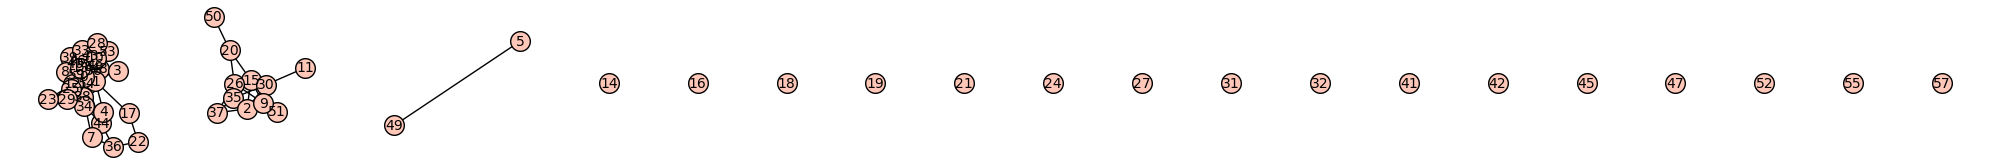

AP_Poll_2021_Week_2_agreement_graph


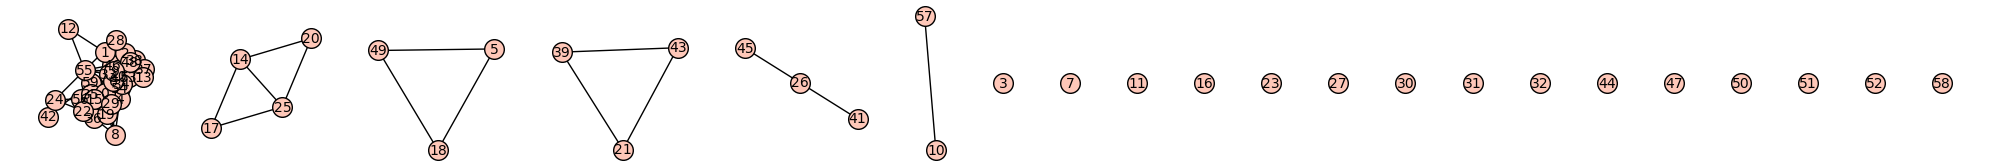

AP_Poll_2021_Week_3_agreement_graph


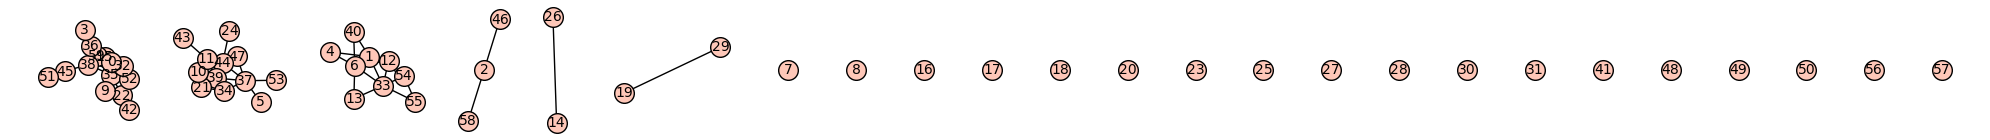

AP_Poll_2021_Week_4_agreement_graph


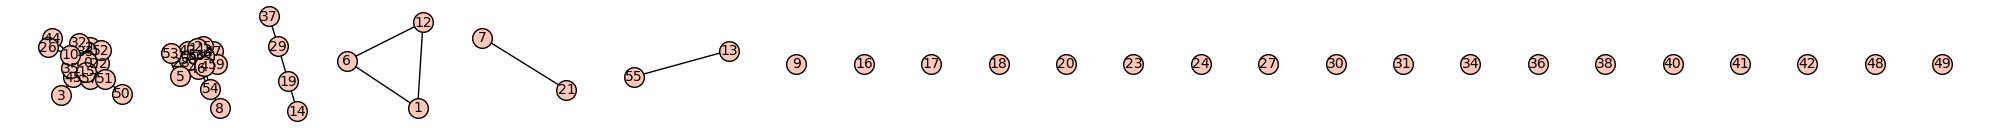

AP_Poll_2021_Week_5_agreement_graph


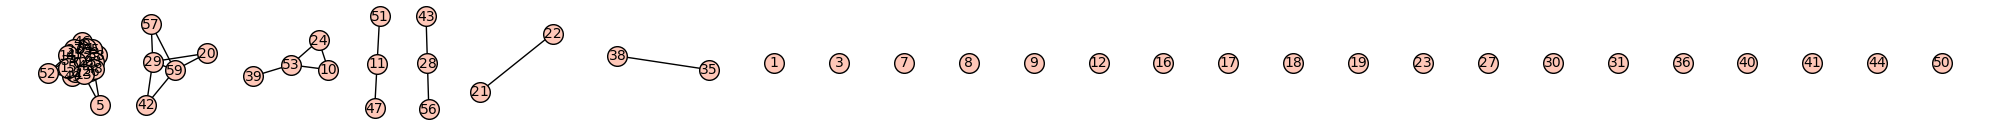

AP_Poll_2021_Week_6_agreement_graph


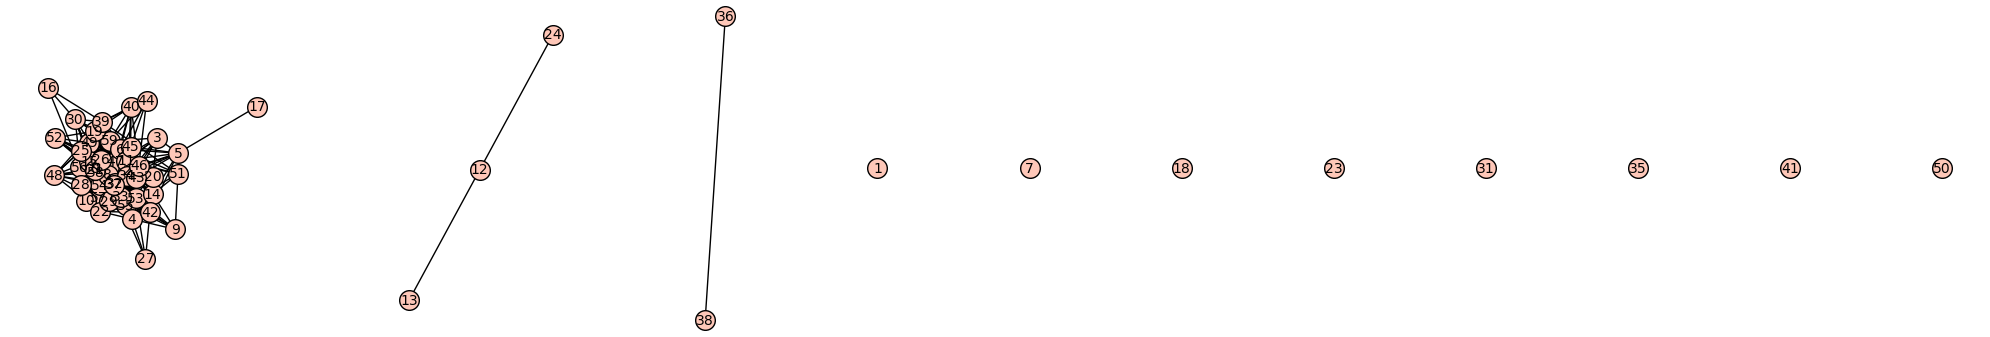

AP_Poll_2021_Week_7_agreement_graph


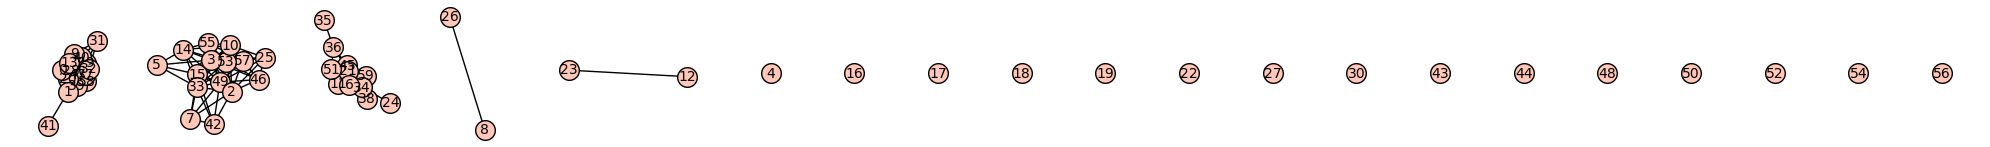

AP_Poll_2021_Week_8_agreement_graph


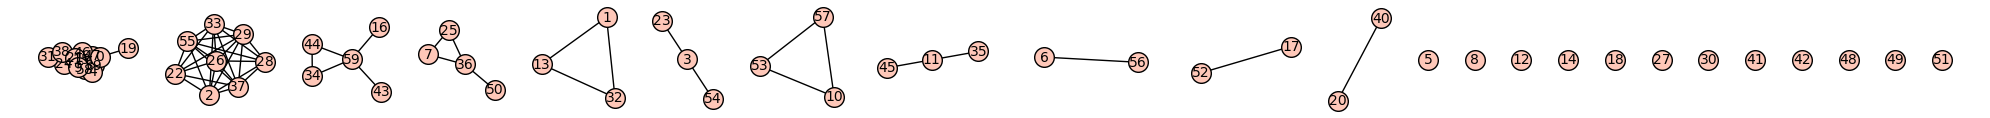

AP_Poll_2021_Week_9_agreement_graph


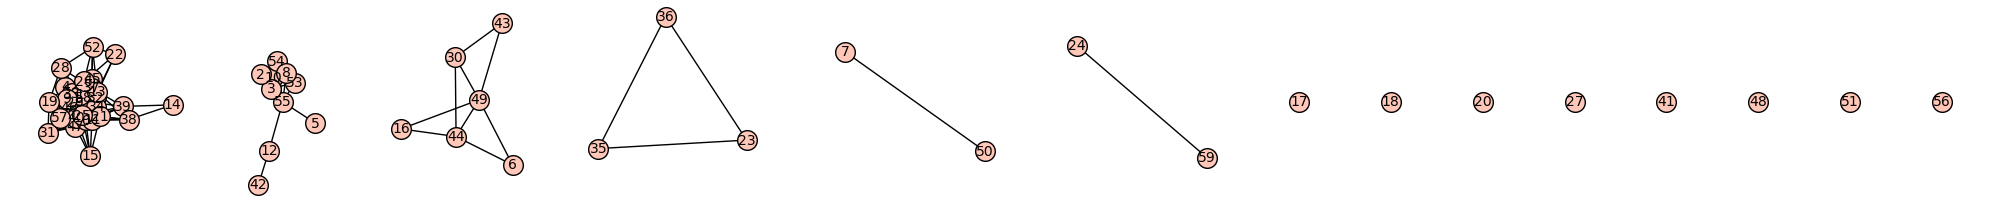

AP_Poll_2021_Week_10_agreement_graph


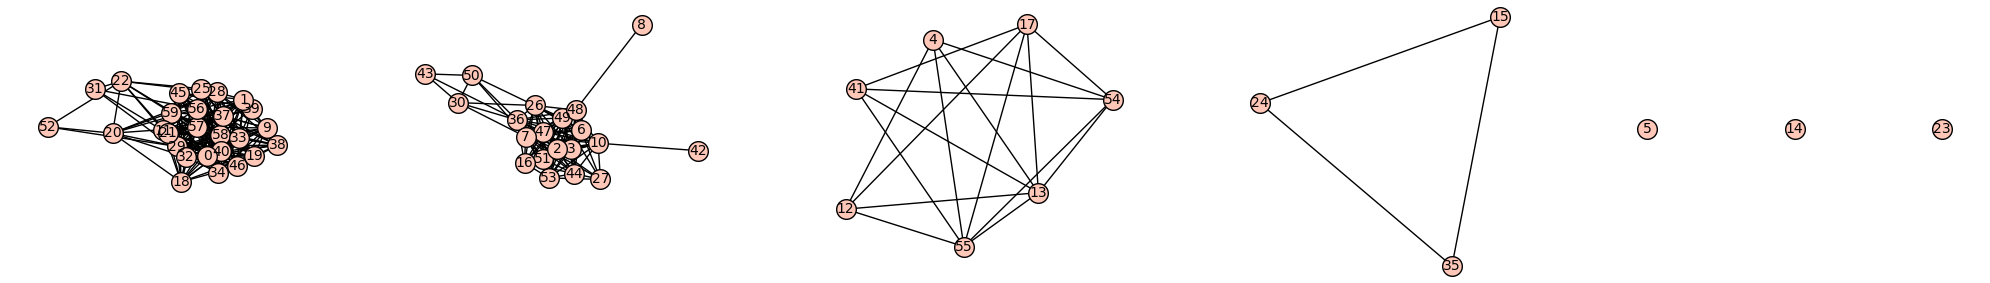

AP_Poll_2021_Week_11_agreement_graph


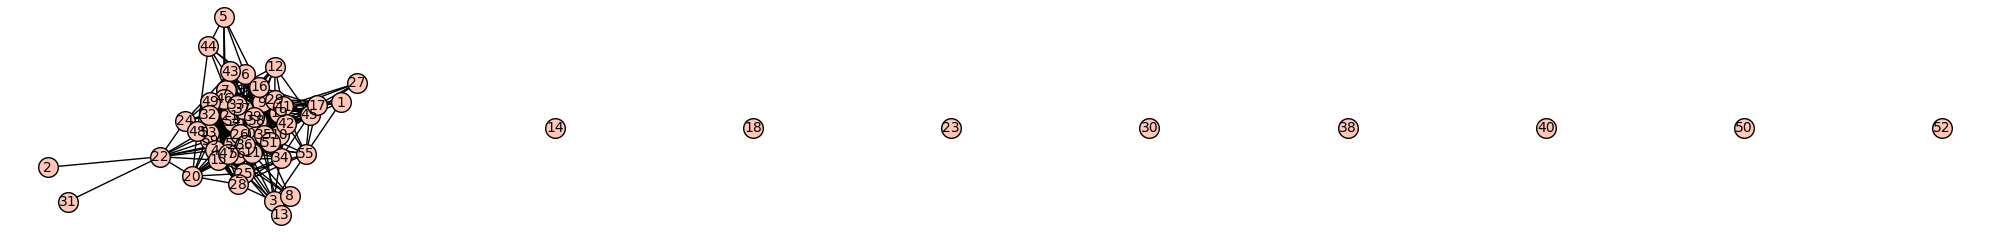

AP_Poll_2021_Week_12_agreement_graph


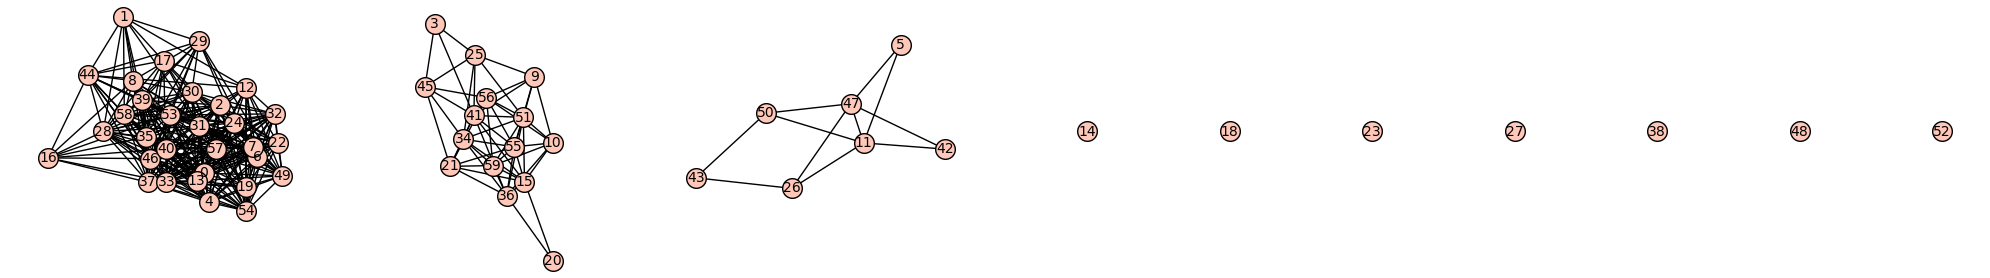

AP_Poll_2021_Week_13_agreement_graph


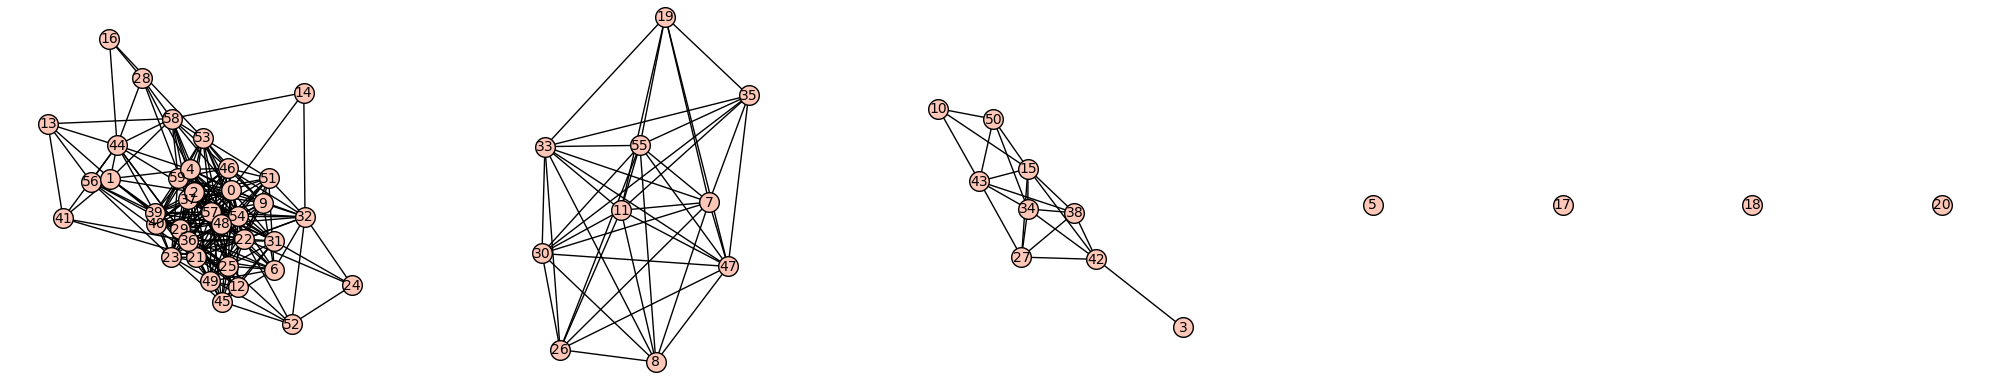

AP_Poll_2021_Week_14_agreement_graph


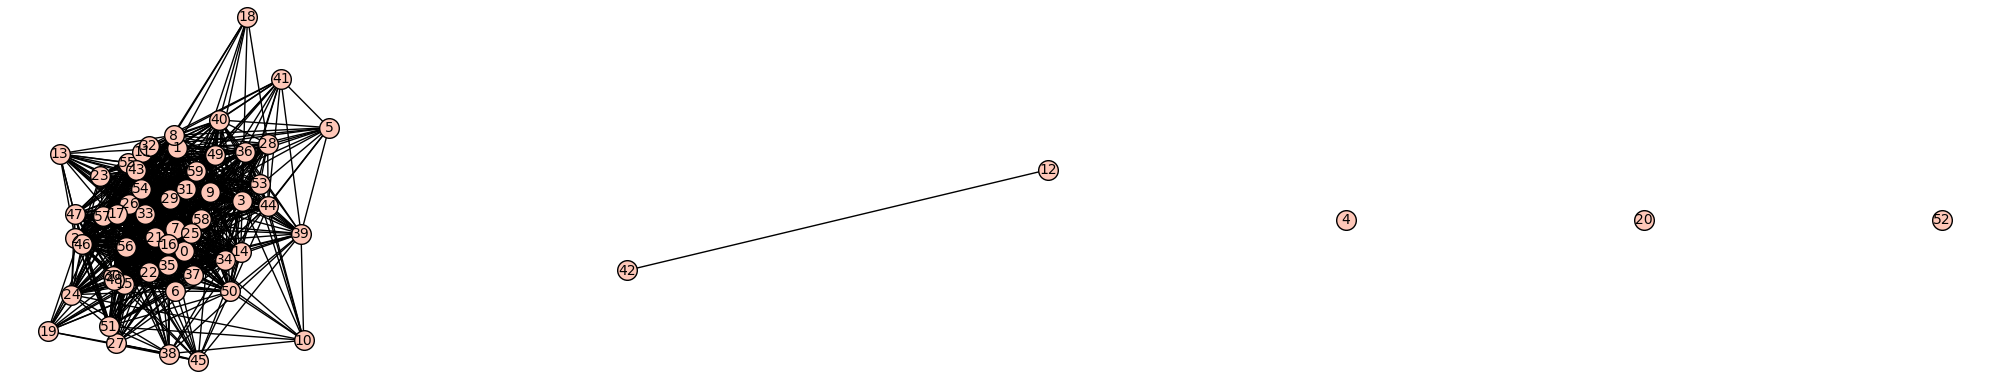

AP_Poll_2021_Week_15_agreement_graph


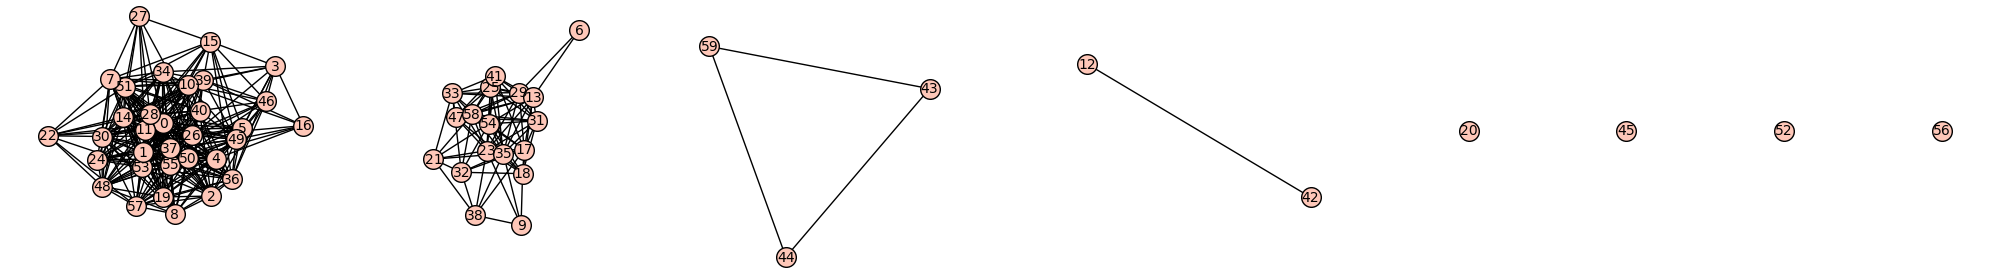

AP_Poll_2021_Final_agreement_graph


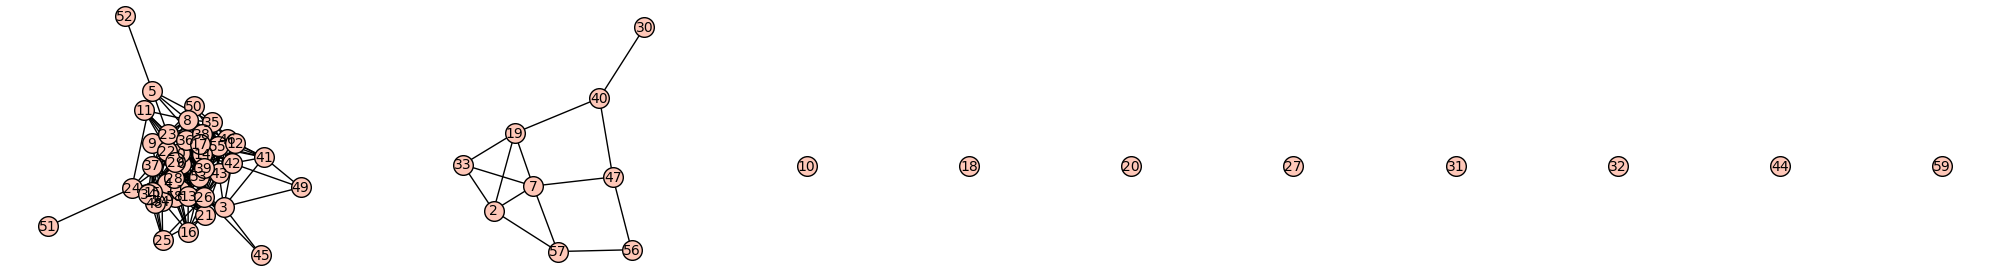

In [6]:
print('AP_Poll_2021_Preseason_agreement_graph')
AP_Poll_2021_Preseason_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_2_agreement_graph')
AP_Poll_2021_Week_2_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_3_agreement_graph')
AP_Poll_2021_Week_3_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_4_agreement_graph')
AP_Poll_2021_Week_4_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_5_agreement_graph')
AP_Poll_2021_Week_5_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_6_agreement_graph')
AP_Poll_2021_Week_6_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_7_agreement_graph')
AP_Poll_2021_Week_7_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_8_agreement_graph')
AP_Poll_2021_Week_8_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_9_agreement_graph')
AP_Poll_2021_Week_9_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_10_agreement_graph')
AP_Poll_2021_Week_10_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_11_agreement_graph')
AP_Poll_2021_Week_11_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_12_agreement_graph')
AP_Poll_2021_Week_12_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_13_agreement_graph')
AP_Poll_2021_Week_13_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_14_agreement_graph')
AP_Poll_2021_Week_14_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Week_15_agreement_graph')
AP_Poll_2021_Week_15_agreement_graph.show(figsize=20)
print('AP_Poll_2021_Final_agreement_graph')
AP_Poll_2021_Final_agreement_graph.show(figsize=20)

AP_Poll_2022_Preseason_agreement_graph


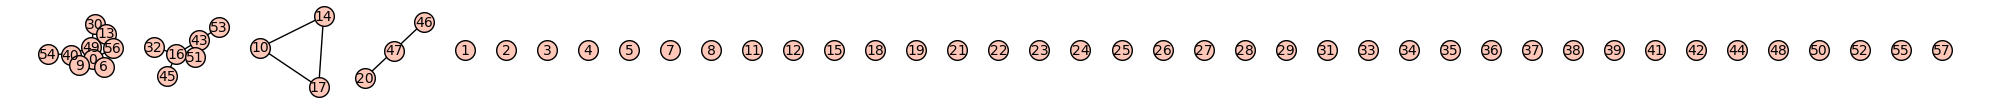

AP_Poll_2022_Week_2_agreement_graph


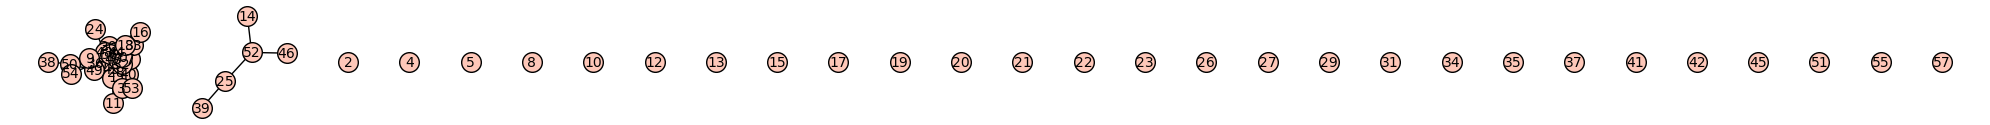

AP_Poll_2022_Week_3_agreement_graph


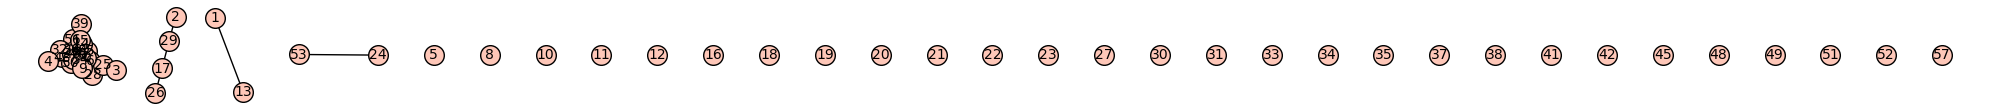

AP_Poll_2022_Week_4_agreement_graph


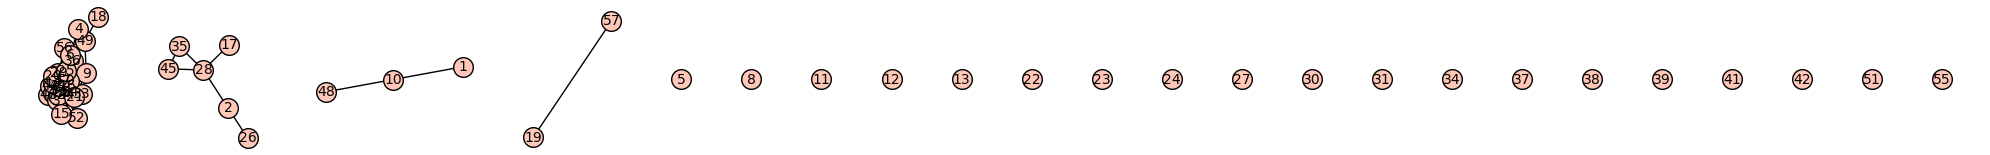

AP_Poll_2022_Week_5_agreement_graph


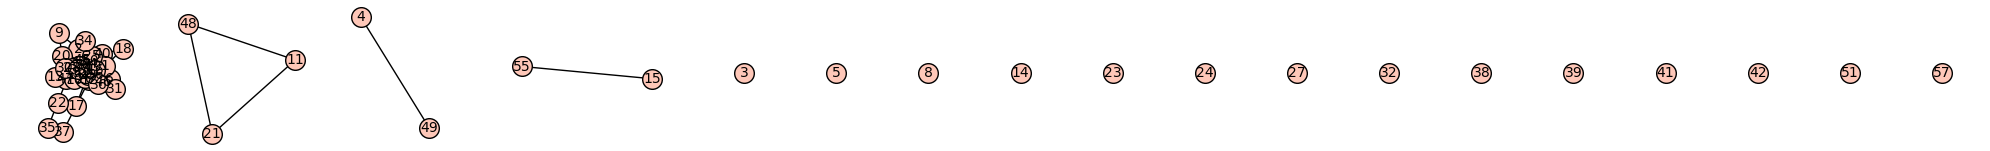

AP_Poll_2022_Week_6_agreement_graph


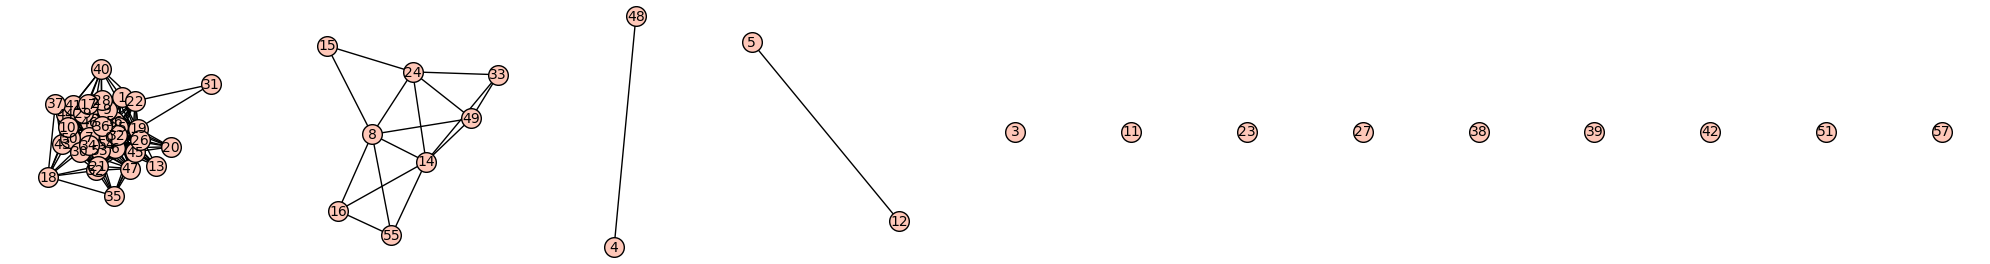

AP_Poll_2022_Week_7_agreement_graph


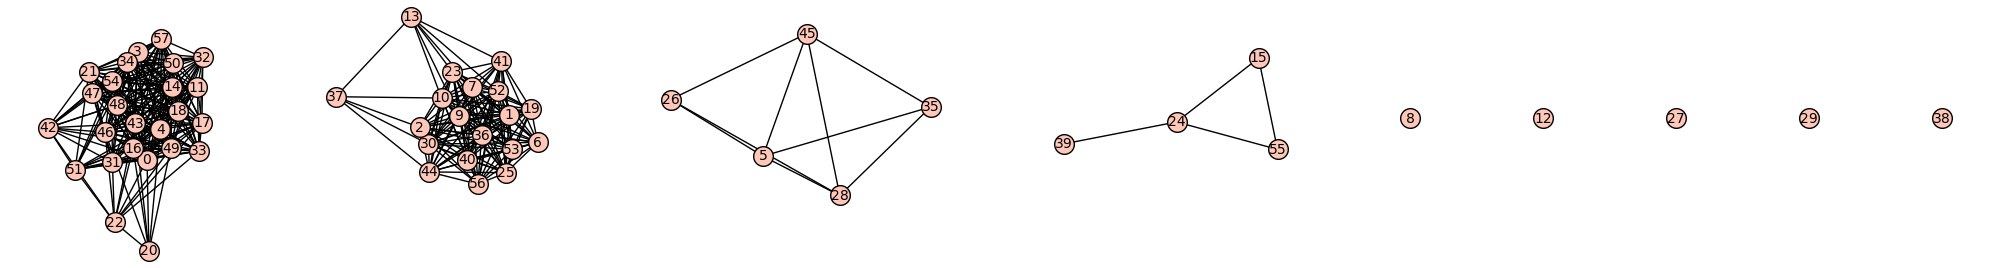

AP_Poll_2022_Week_8_agreement_graph


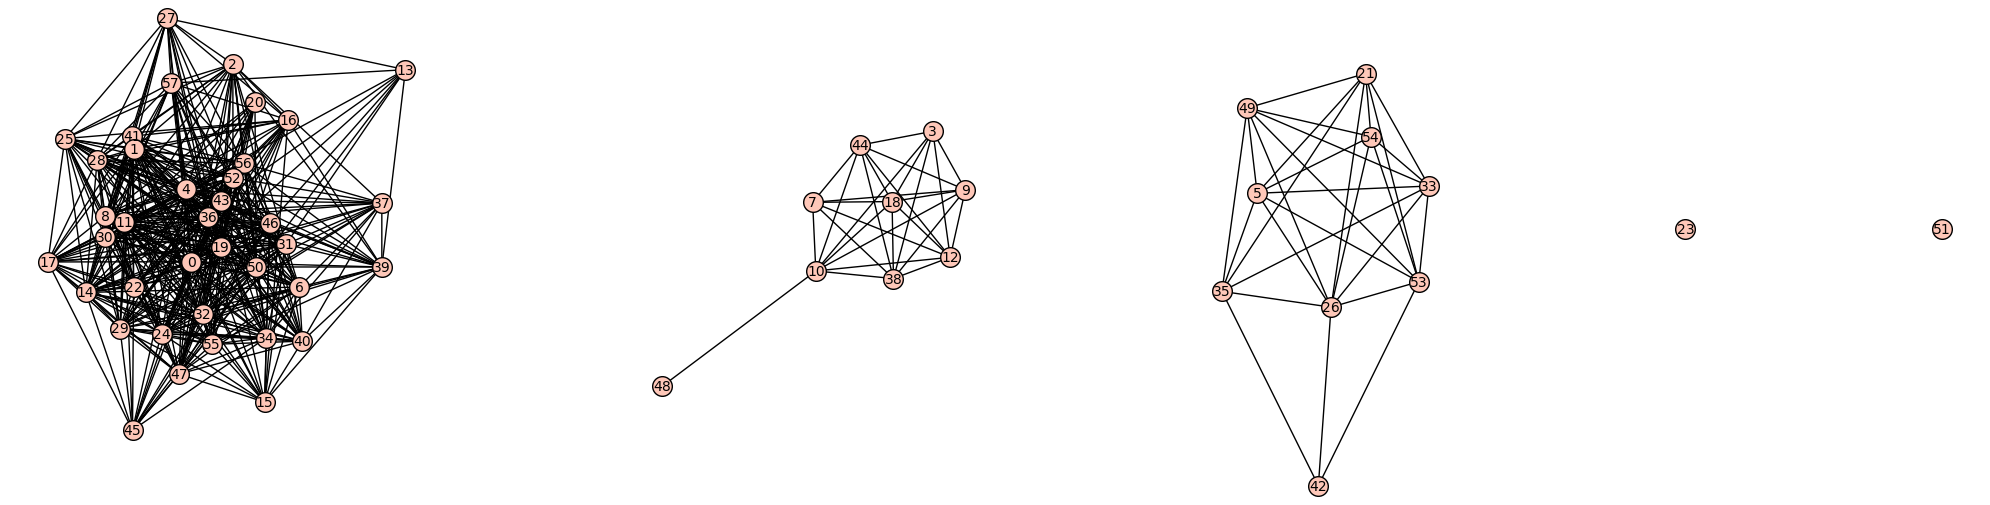

AP_Poll_2022_Week_9_agreement_graph


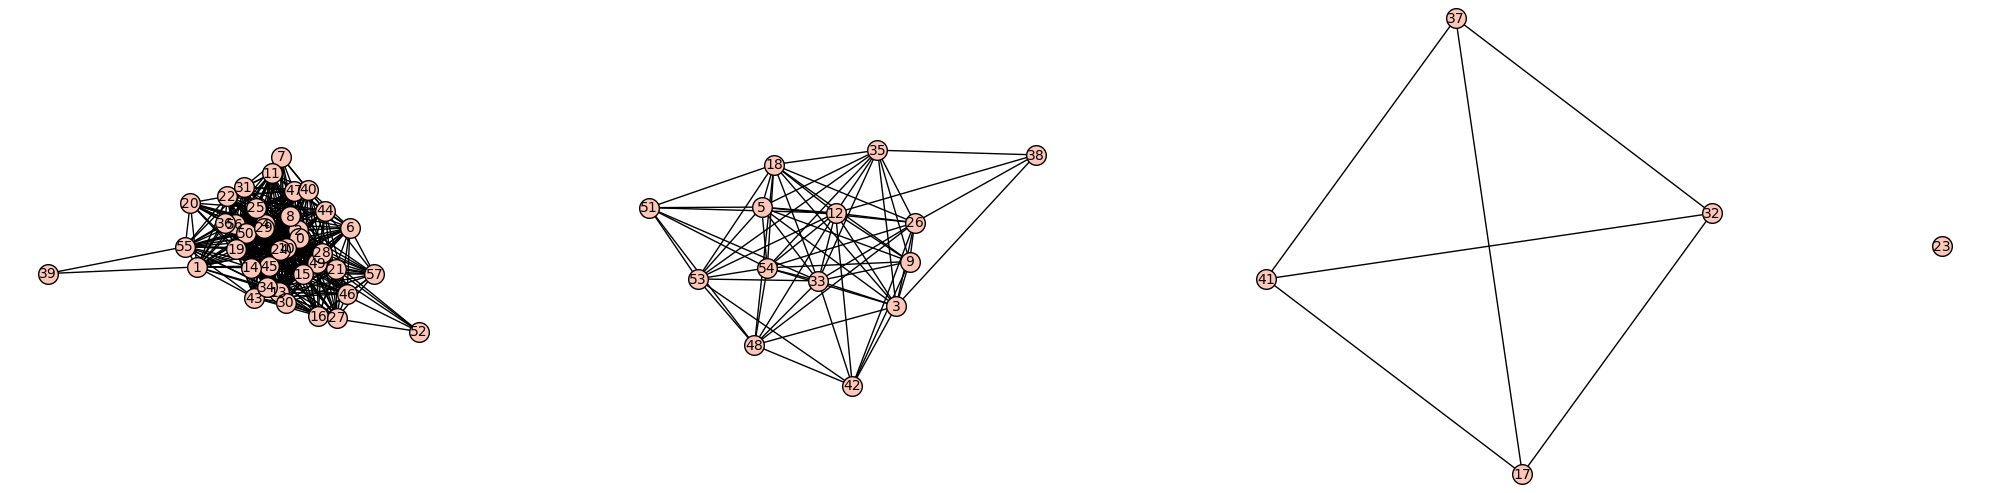

AP_Poll_2022_Week_10_agreement_graph


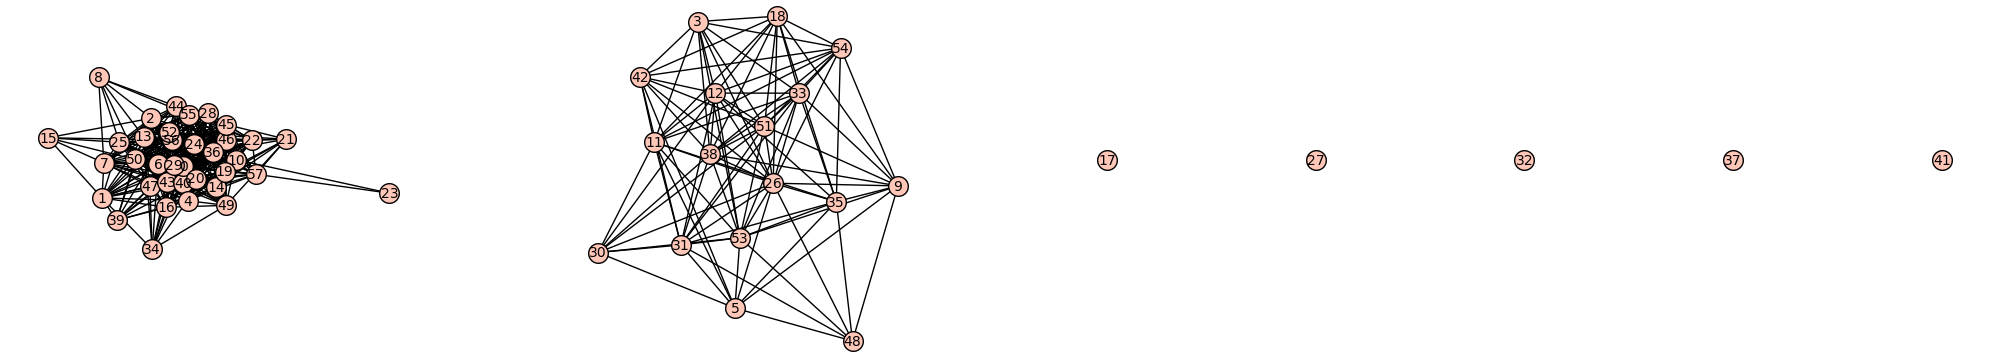

AP_Poll_2022_Week_11_agreement_graph


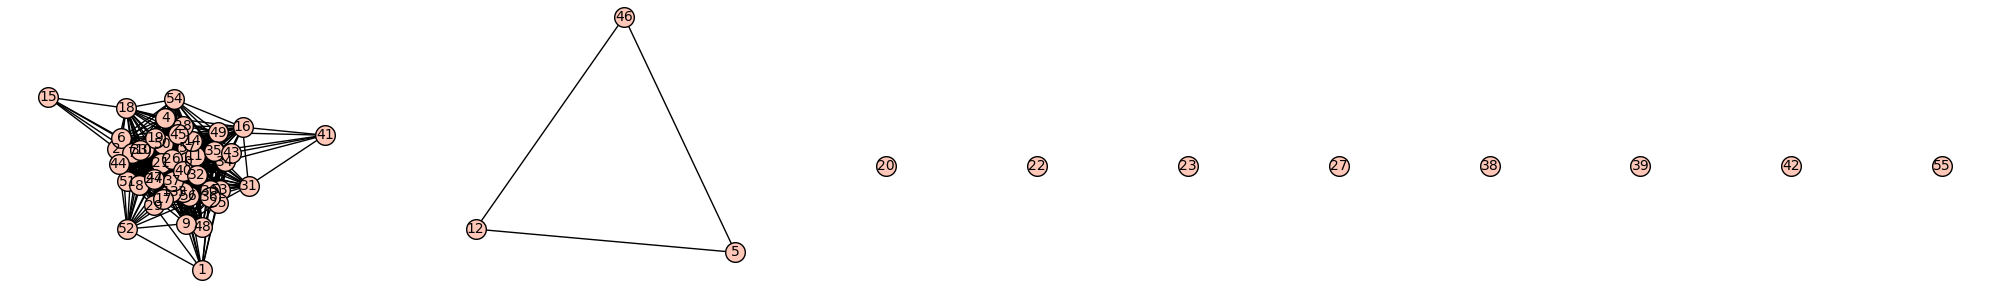

AP_Poll_2022_Week_12_agreement_graph


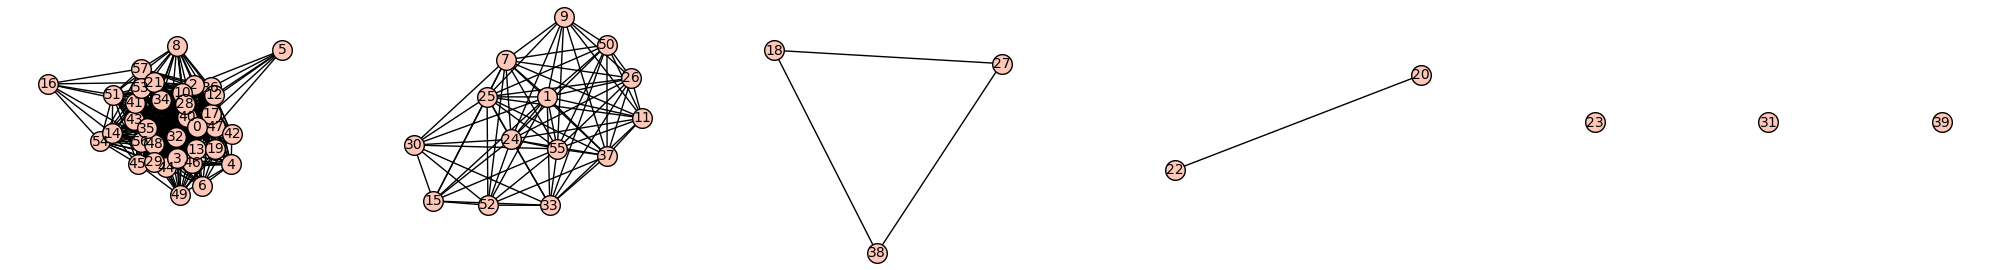

AP_Poll_2022_Week_13_agreement_graph


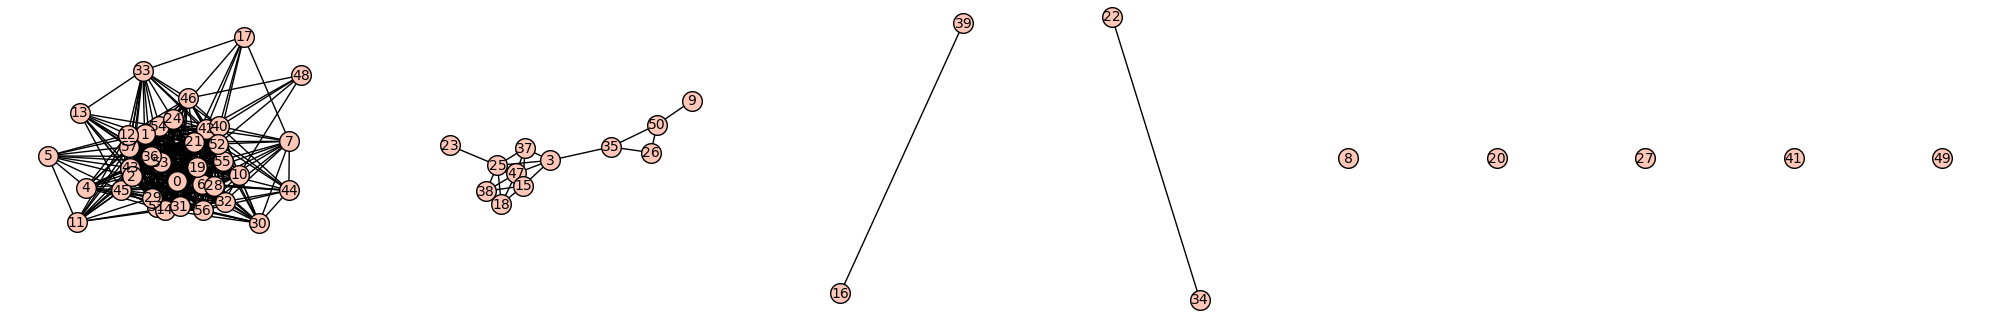

AP_Poll_2022_Week_14_agreement_graph


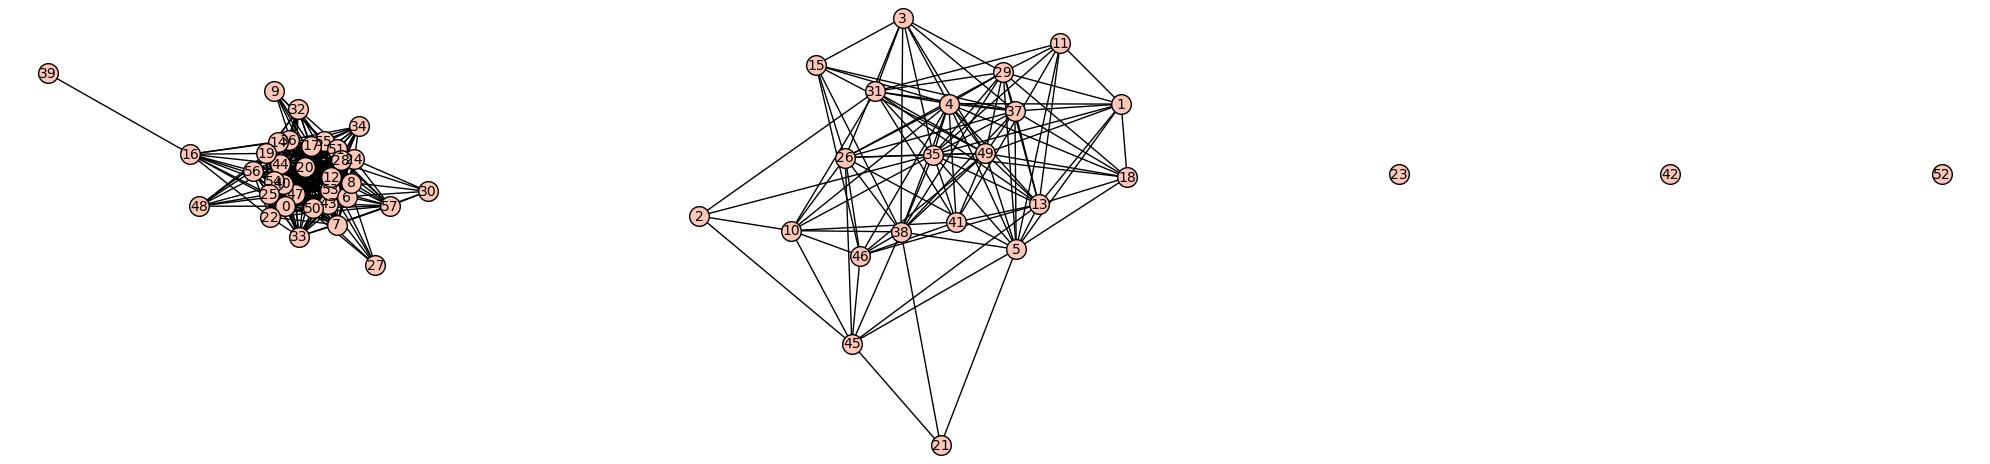

AP_Poll_2022_Week_15_agreement_graph


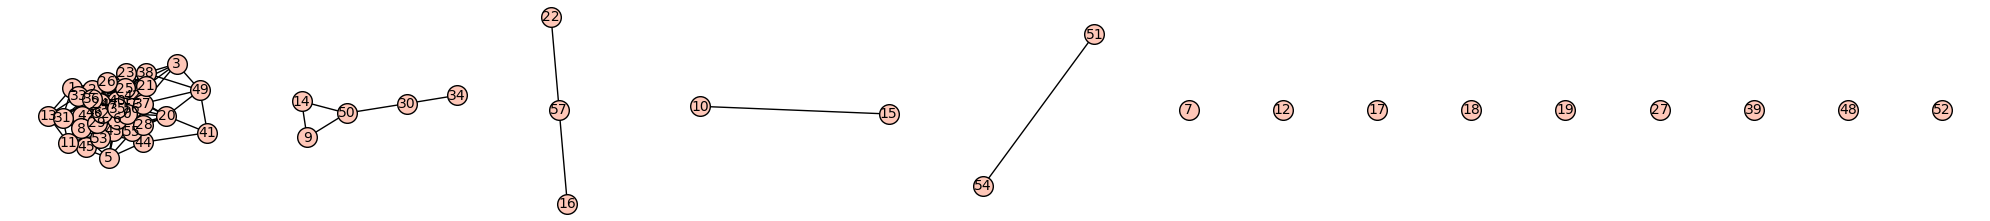

AP_Poll_2022_Final_agreement_graph


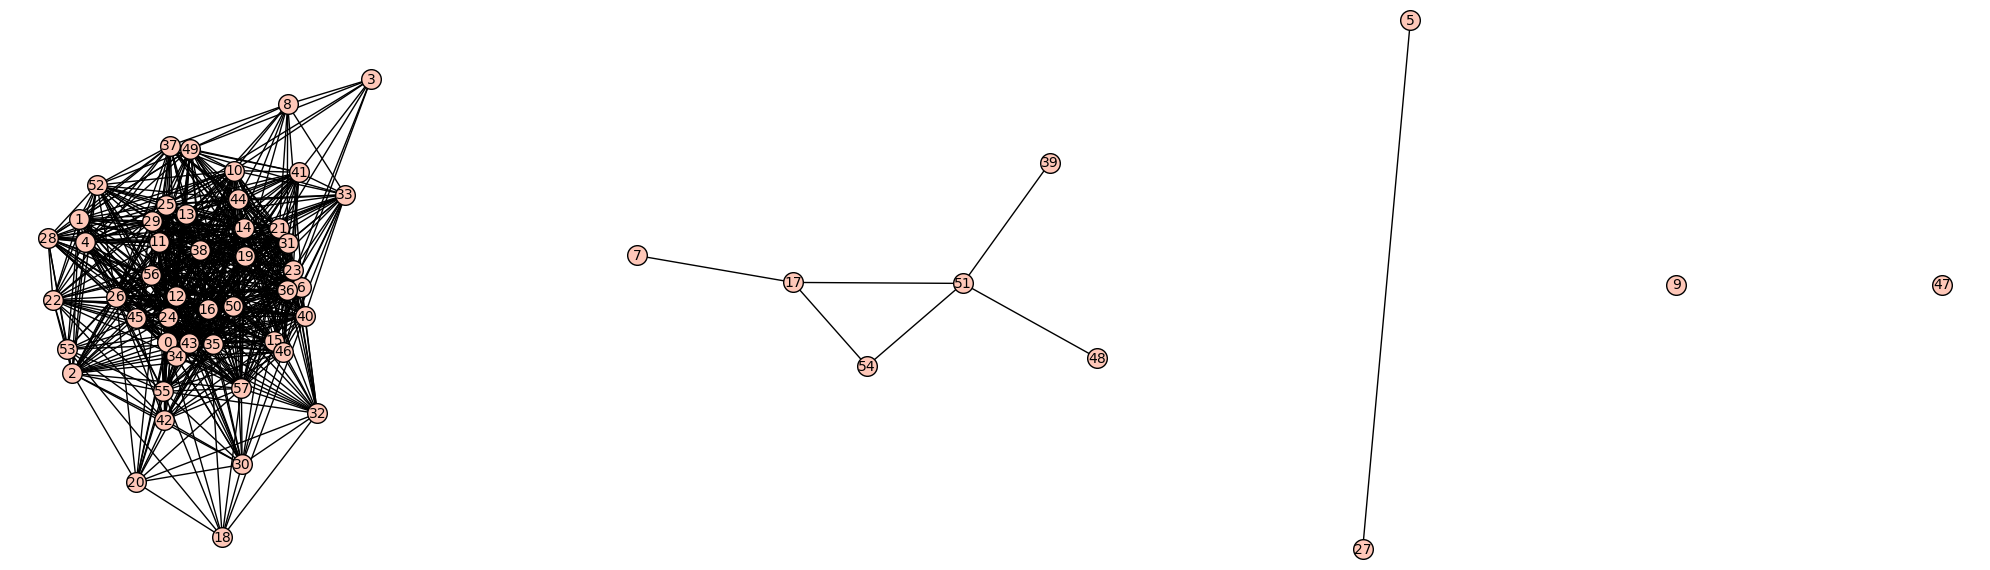

In [7]:
print('AP_Poll_2022_Preseason_agreement_graph')
AP_Poll_2022_Preseason_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_2_agreement_graph')
AP_Poll_2022_Week_2_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_3_agreement_graph')
AP_Poll_2022_Week_3_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_4_agreement_graph')
AP_Poll_2022_Week_4_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_5_agreement_graph')
AP_Poll_2022_Week_5_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_6_agreement_graph')
AP_Poll_2022_Week_6_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_7_agreement_graph')
AP_Poll_2022_Week_7_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_8_agreement_graph')
AP_Poll_2022_Week_8_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_9_agreement_graph')
AP_Poll_2022_Week_9_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_10_agreement_graph')
AP_Poll_2022_Week_10_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_11_agreement_graph')
AP_Poll_2022_Week_11_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_12_agreement_graph')
AP_Poll_2022_Week_12_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_13_agreement_graph')
AP_Poll_2022_Week_13_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_14_agreement_graph')
AP_Poll_2022_Week_14_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Week_15_agreement_graph')
AP_Poll_2022_Week_15_agreement_graph.show(figsize=20)
print('AP_Poll_2022_Final_agreement_graph')
AP_Poll_2022_Final_agreement_graph.show(figsize=20)

AP_Poll_2023_Preseason_agreement_graph


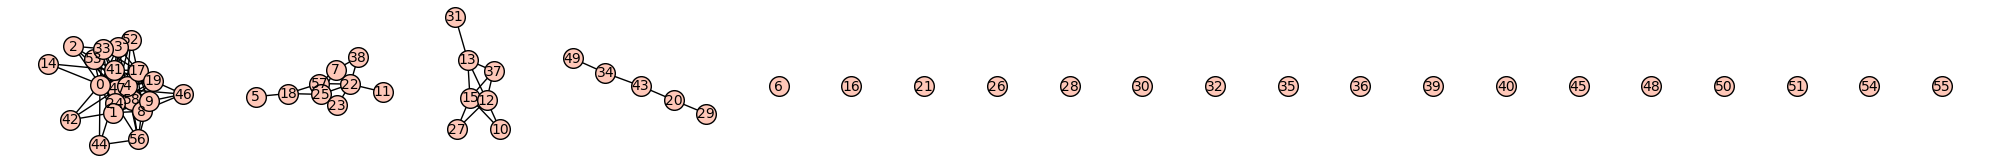

AP_Poll_2023_Week_2_agreement_graph


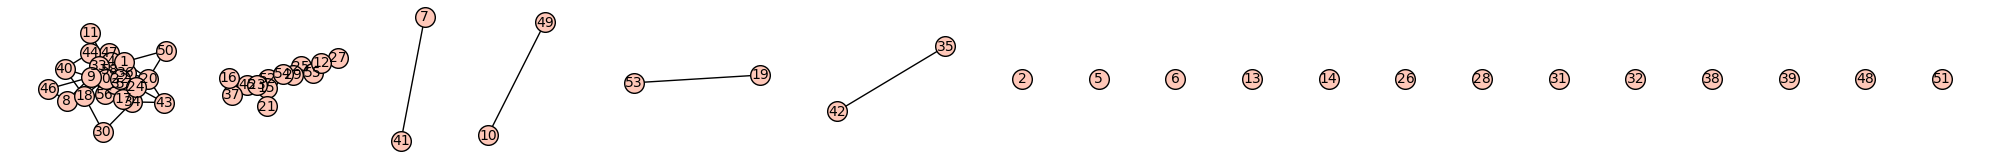

AP_Poll_2023_Week_3_agreement_graph


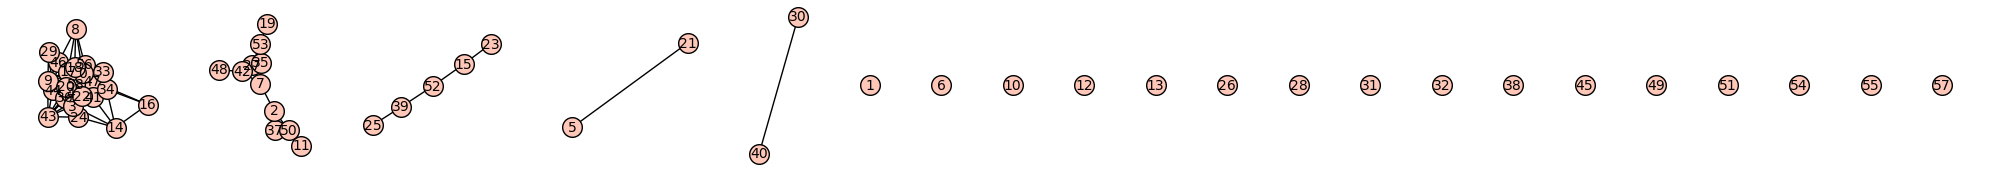

AP_Poll_2023_Week_4_agreement_graph


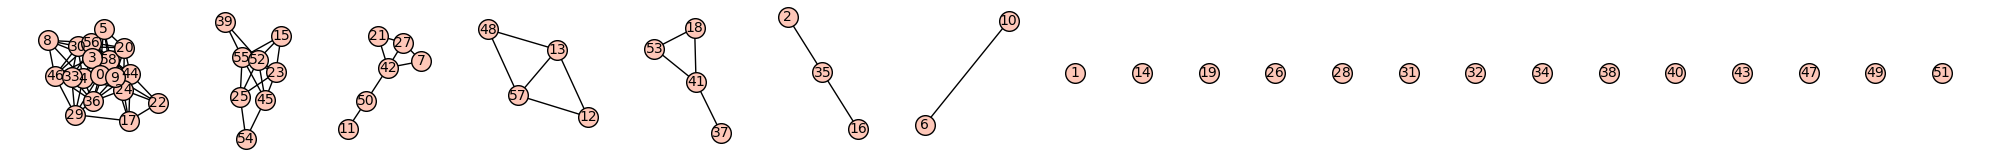

AP_Poll_2023_Week_5_agreement_graph


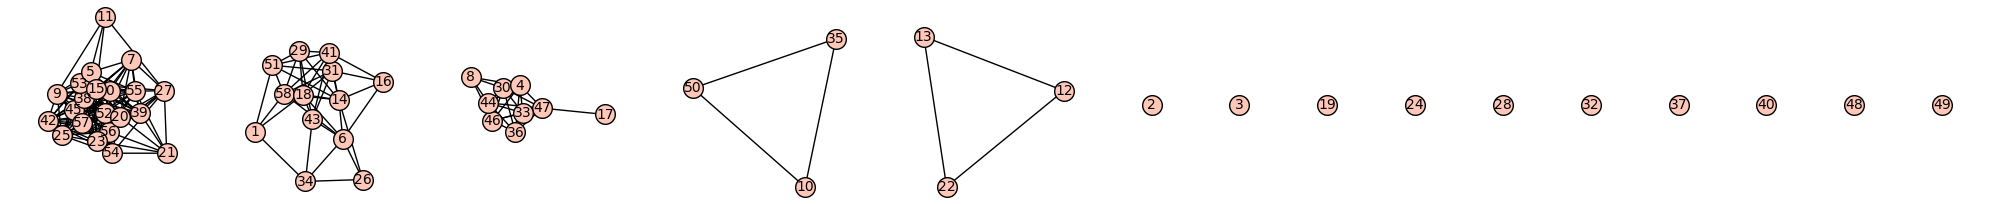

AP_Poll_2023_Week_6_agreement_graph


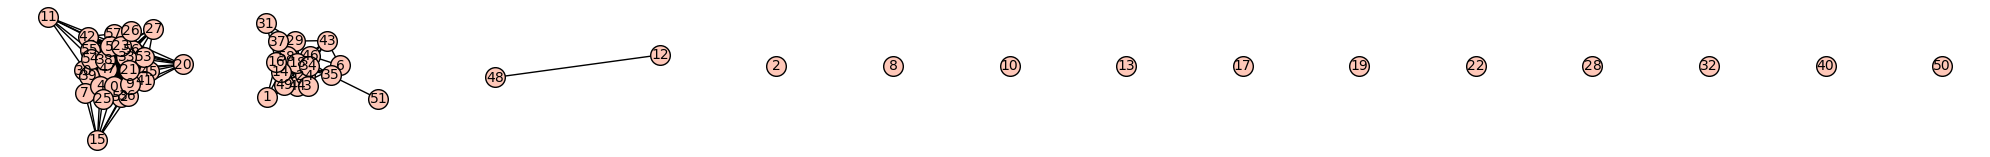

AP_Poll_2023_Week_7_agreement_graph


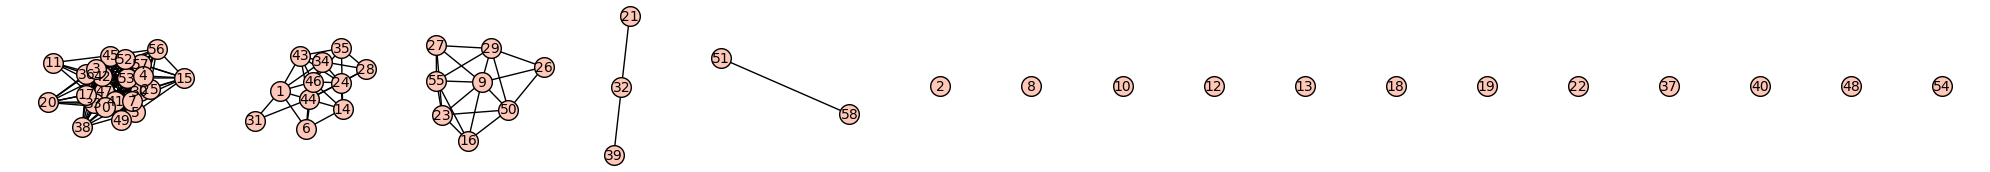

AP_Poll_2023_Week_8_agreement_graph


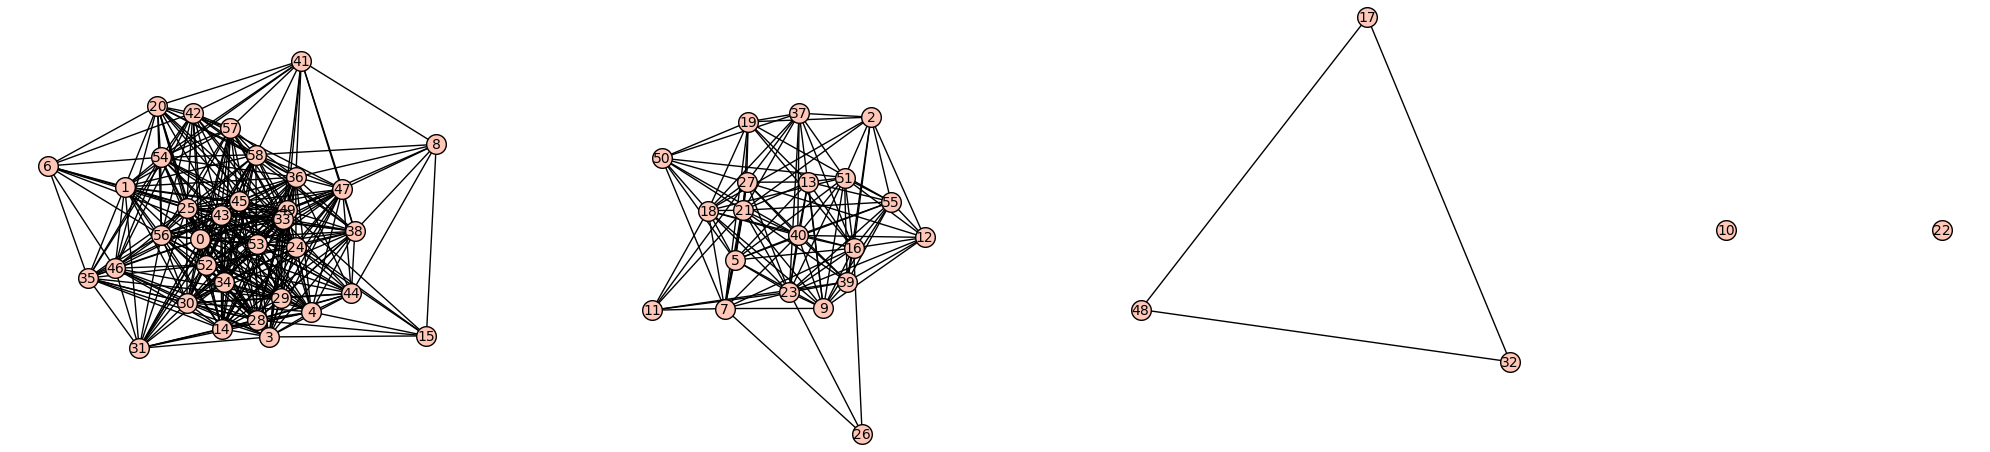

AP_Poll_2023_Week_9_agreement_graph


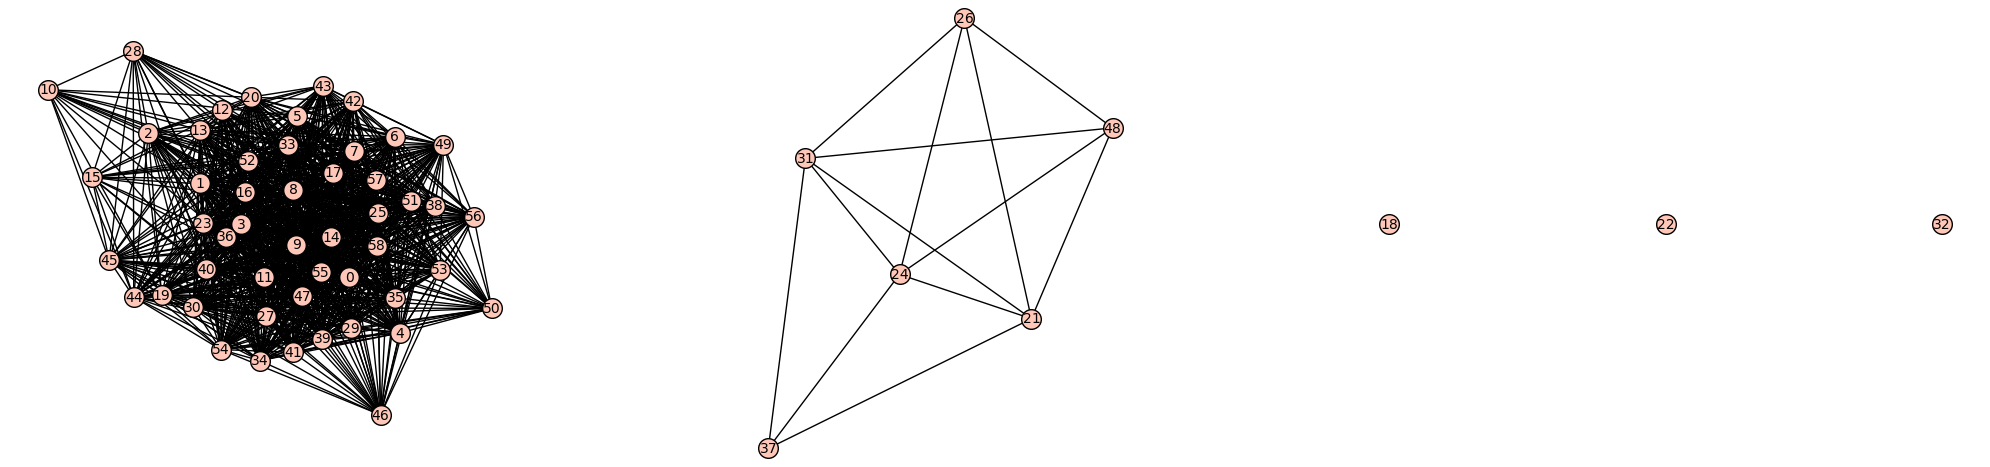

AP_Poll_2023_Week_10_agreement_graph


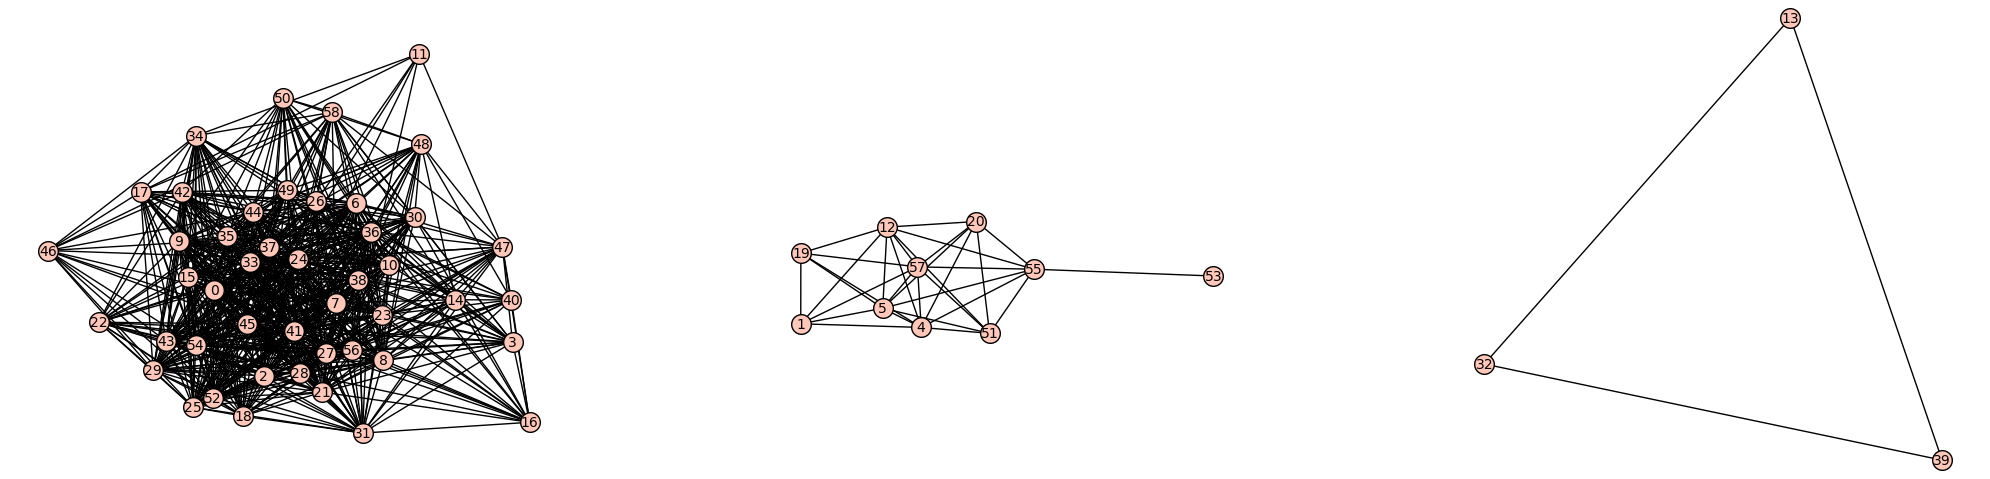

AP_Poll_2023_Week_11_agreement_graph


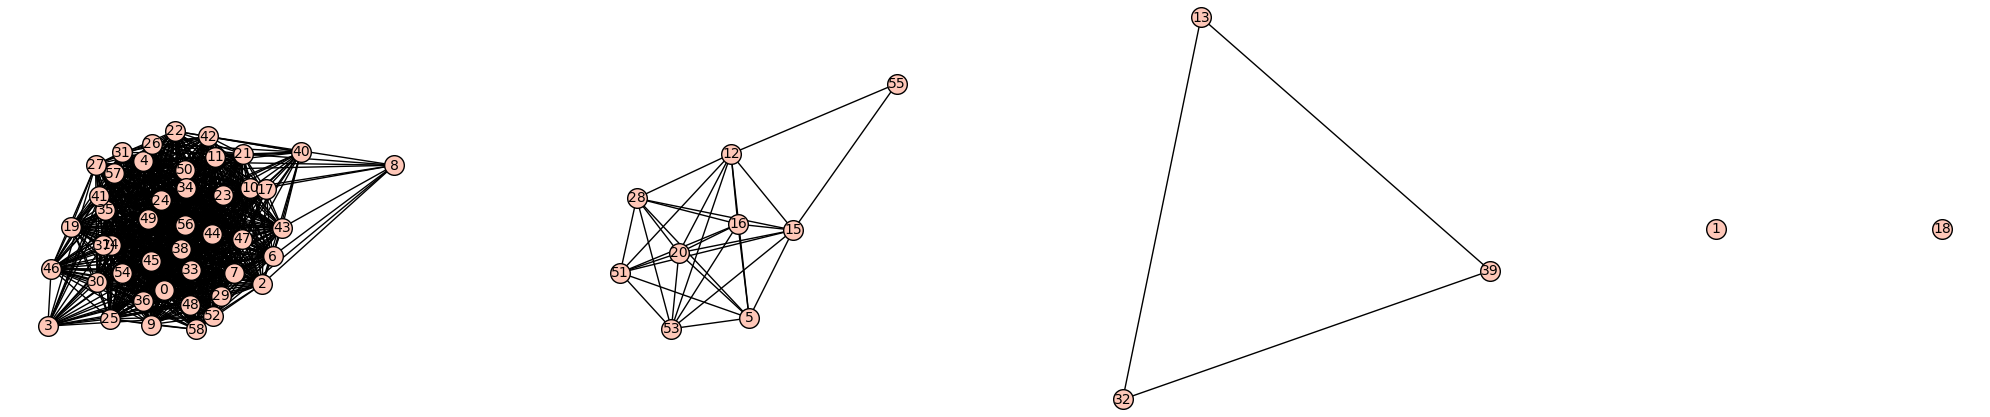

AP_Poll_2023_Week_12_agreement_graph


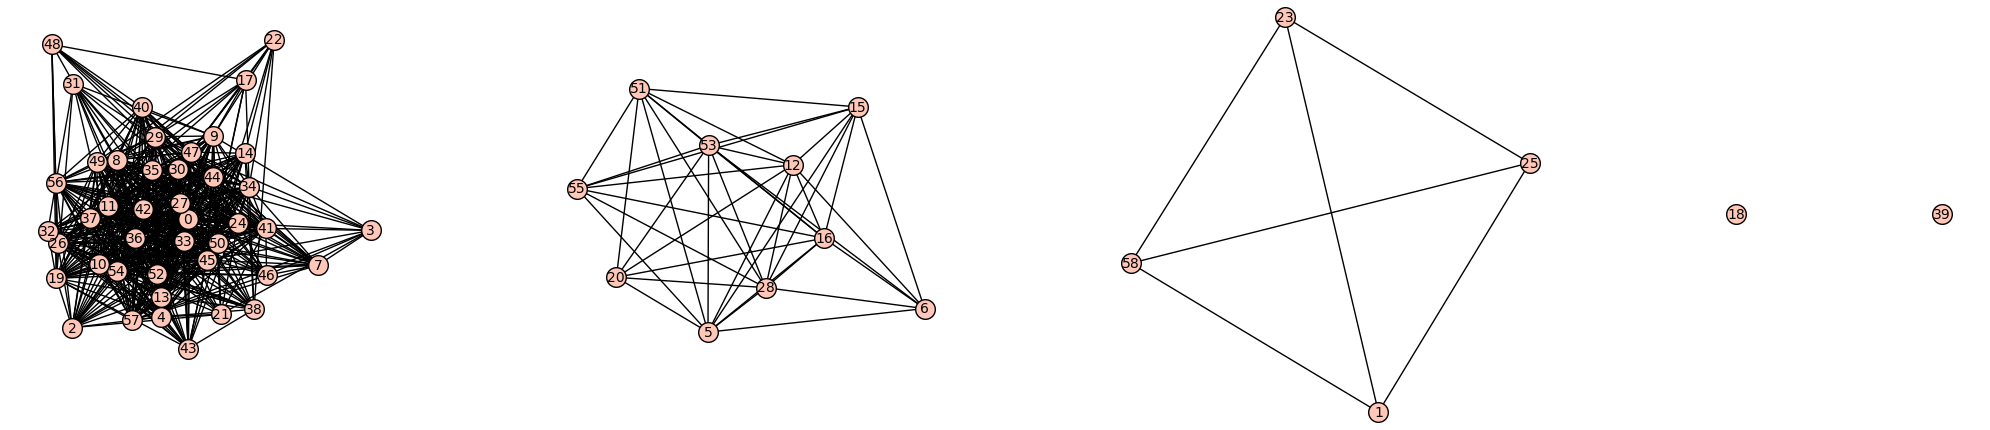

AP_Poll_2023_Week_13_agreement_graph


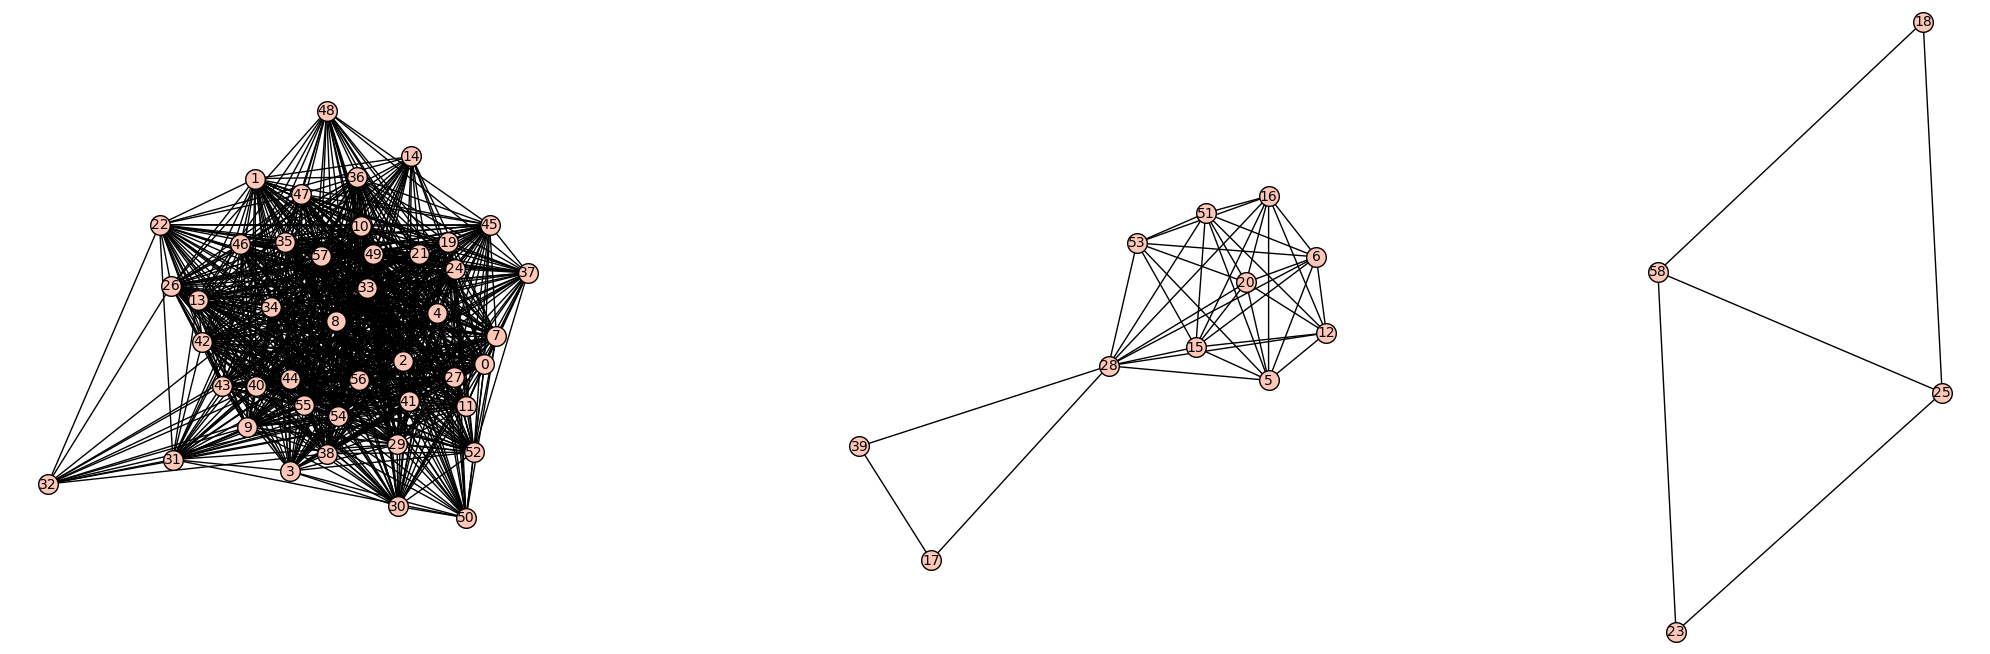

AP_Poll_2023_Week_14_agreement_graph


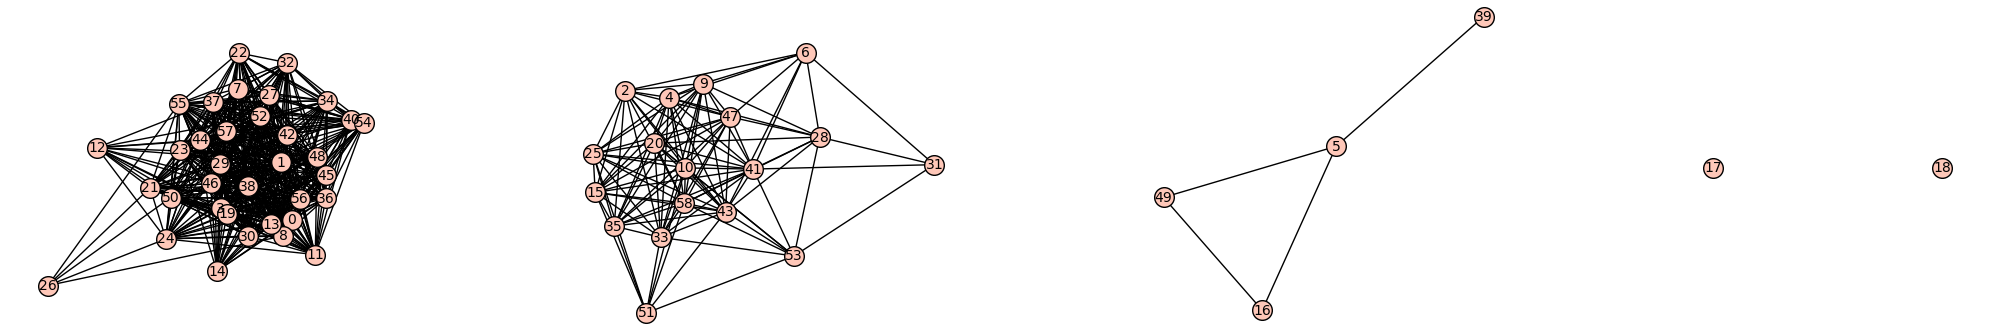

AP_Poll_2023_Week_15_agreement_graph


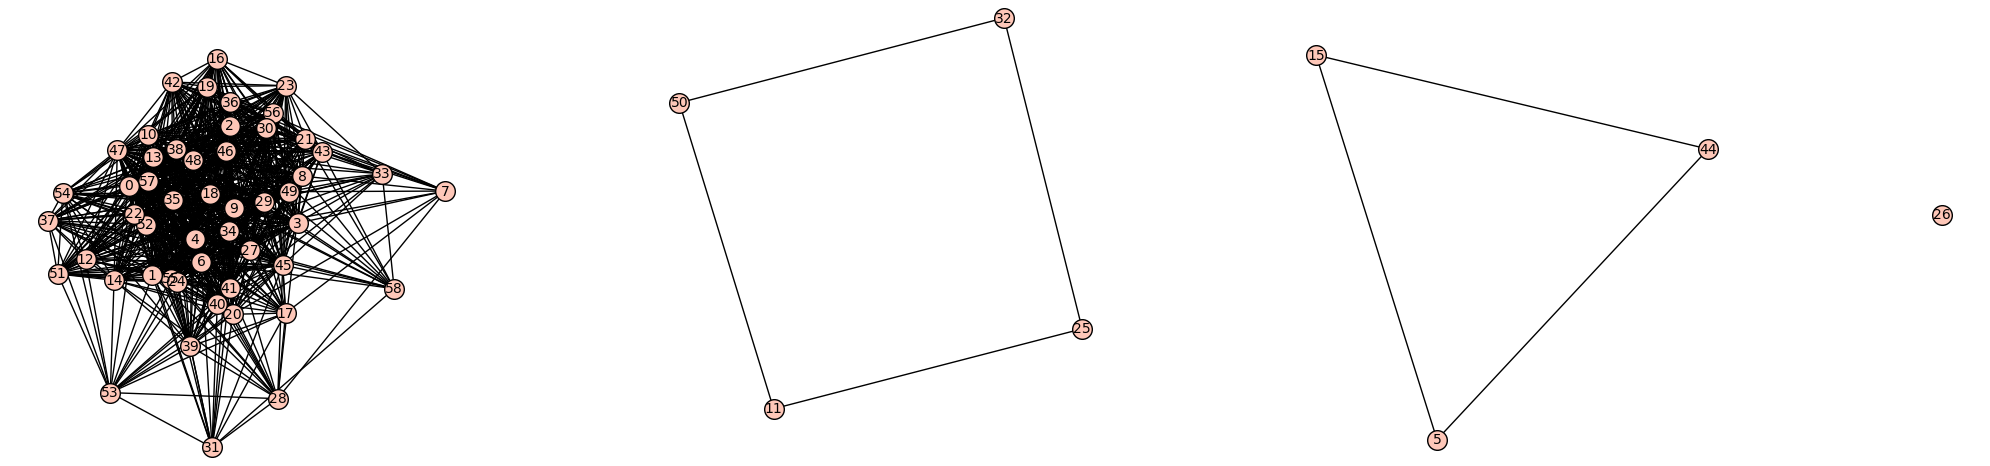

AP_Poll_2023_Final_agreement_graph


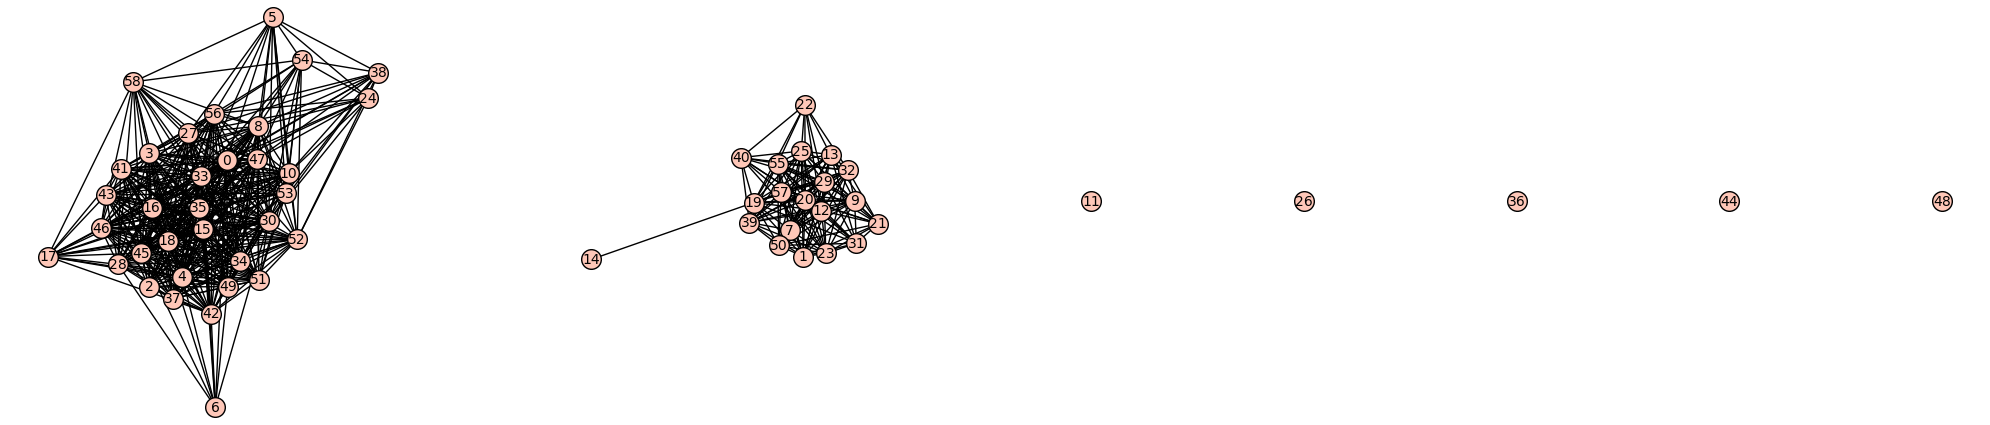

In [8]:
print('AP_Poll_2023_Preseason_agreement_graph')
AP_Poll_2023_Preseason_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_2_agreement_graph')
AP_Poll_2023_Week_2_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_3_agreement_graph')
AP_Poll_2023_Week_3_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_4_agreement_graph')
AP_Poll_2023_Week_4_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_5_agreement_graph')
AP_Poll_2023_Week_5_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_6_agreement_graph')
AP_Poll_2023_Week_6_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_7_agreement_graph')
AP_Poll_2023_Week_7_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_8_agreement_graph')
AP_Poll_2023_Week_8_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_9_agreement_graph')
AP_Poll_2023_Week_9_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_10_agreement_graph')
AP_Poll_2023_Week_10_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_11_agreement_graph')
AP_Poll_2023_Week_11_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_12_agreement_graph')
AP_Poll_2023_Week_12_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_13_agreement_graph')
AP_Poll_2023_Week_13_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_14_agreement_graph')
AP_Poll_2023_Week_14_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Week_15_agreement_graph')
AP_Poll_2023_Week_15_agreement_graph.show(figsize=20)
print('AP_Poll_2023_Final_agreement_graph')
AP_Poll_2023_Final_agreement_graph.show(figsize=20)

AP_Poll_2024_Preseason_agreement_graph


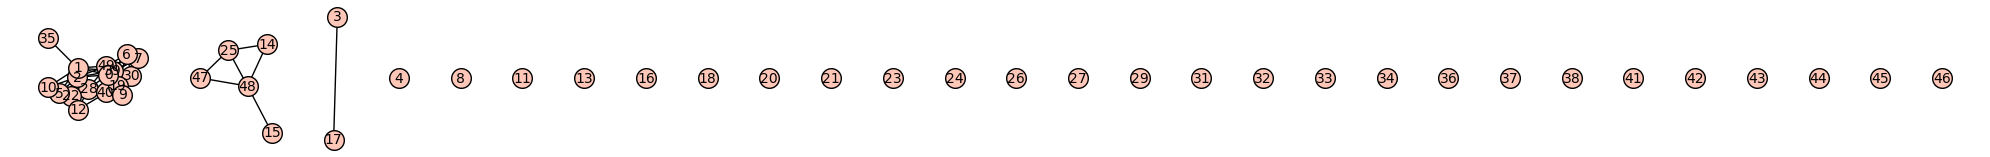

AP_Poll_2024_Week_2_agreement_graph


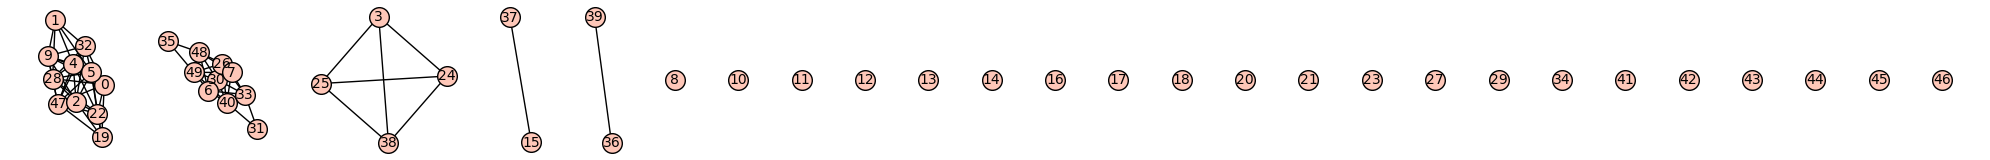

AP_Poll_2024_Week_3_agreement_graph


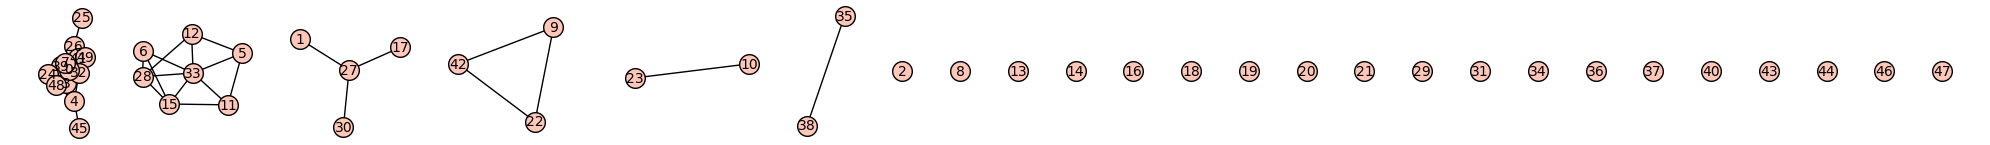

AP_Poll_2024_Week_4_agreement_graph


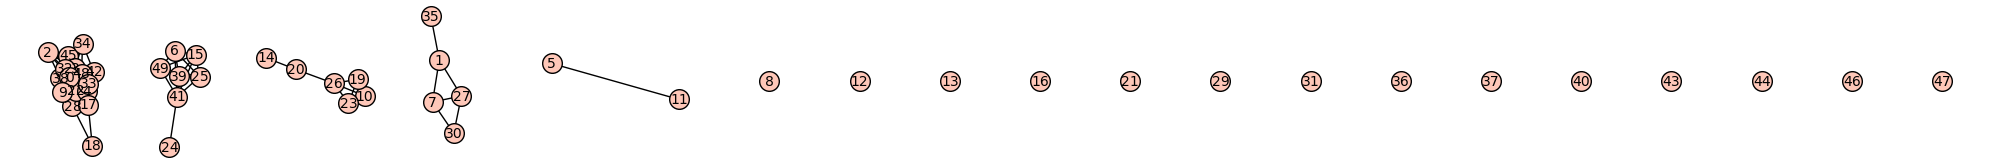

AP_Poll_2024_Week_5_agreement_graph


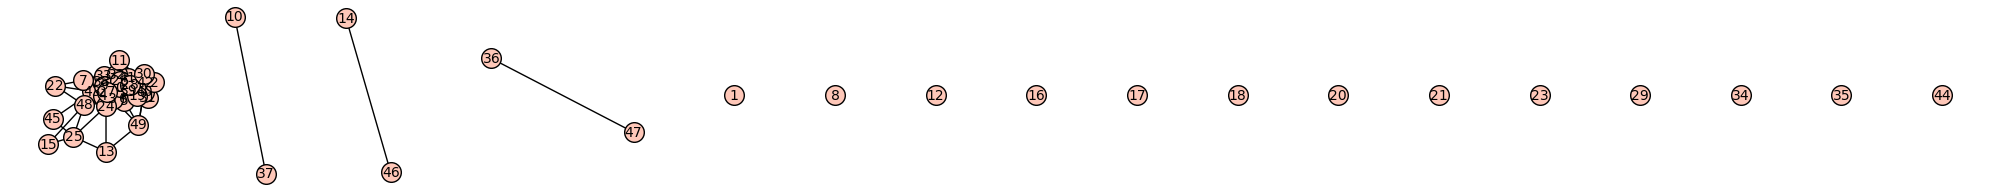

AP_Poll_2024_Week_6_agreement_graph


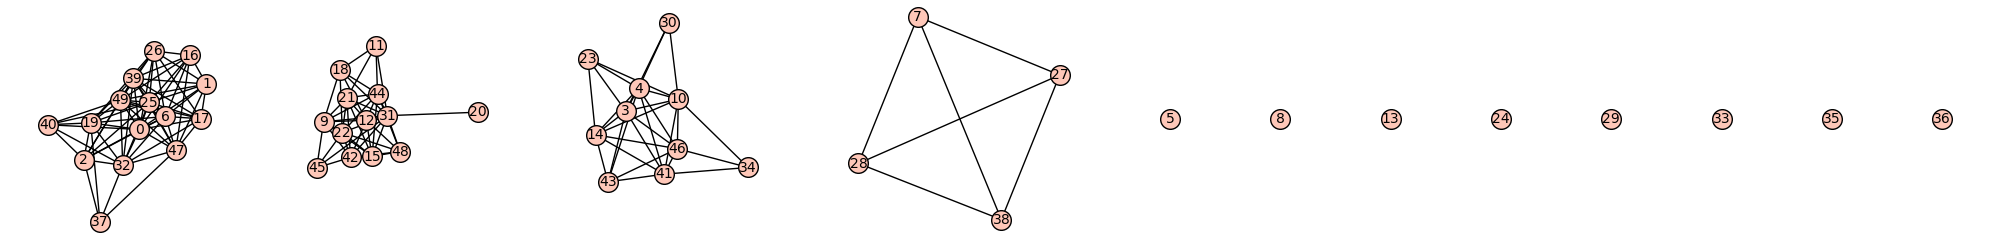

AP_Poll_2024_Week_7_agreement_graph


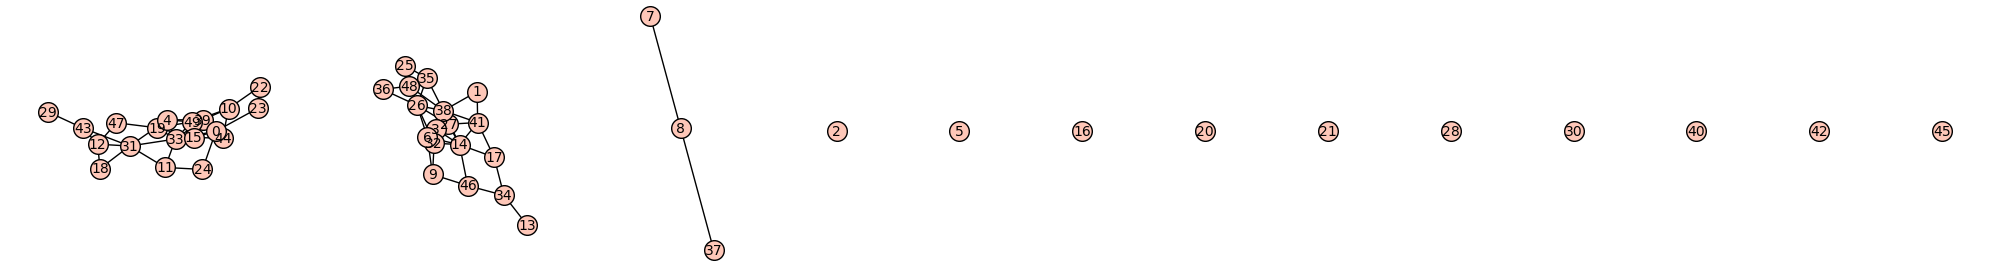

AP_Poll_2024_Week_8_agreement_graph


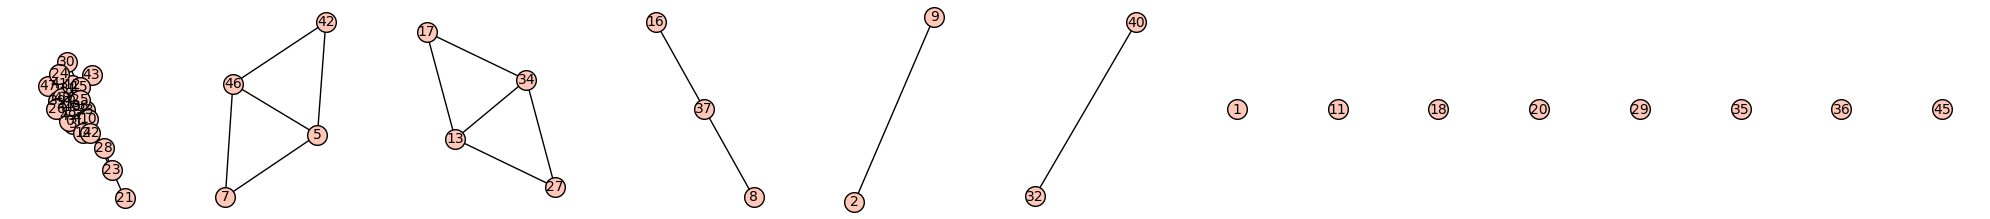

AP_Poll_2024_Week_9_agreement_graph


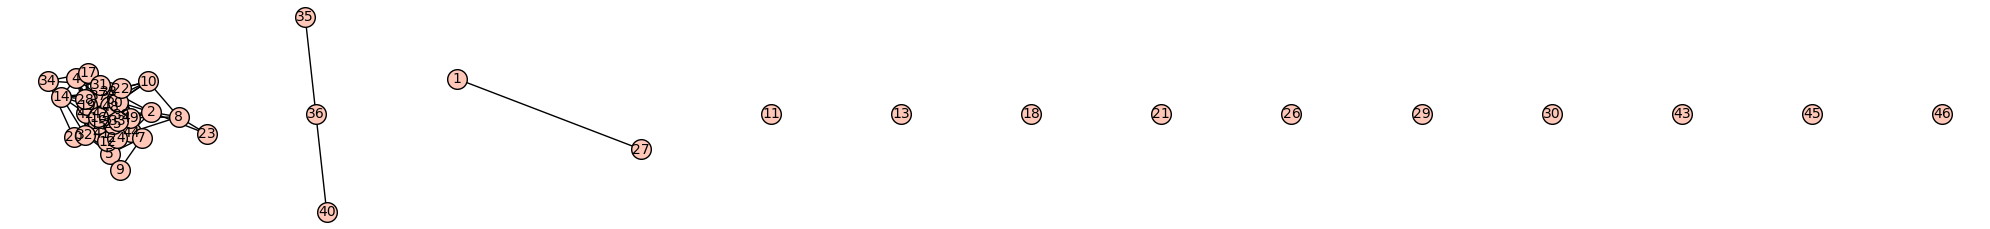

AP_Poll_2024_Week_10_agreement_graph


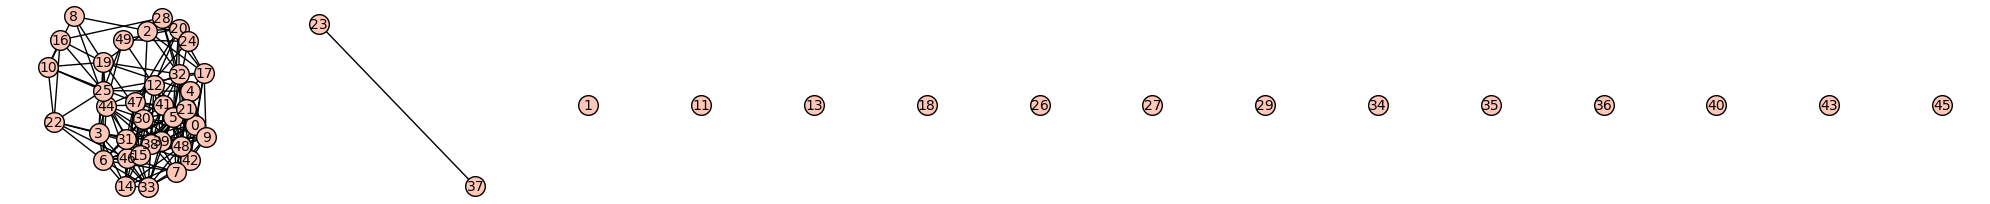

AP_Poll_2024_Week_11_agreement_graph


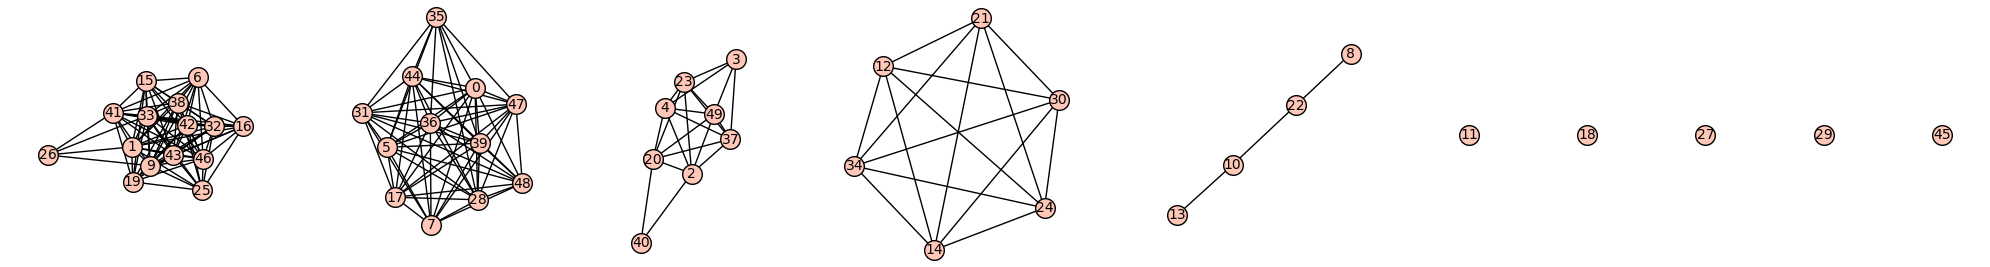

AP_Poll_2024_Week_12_agreement_graph


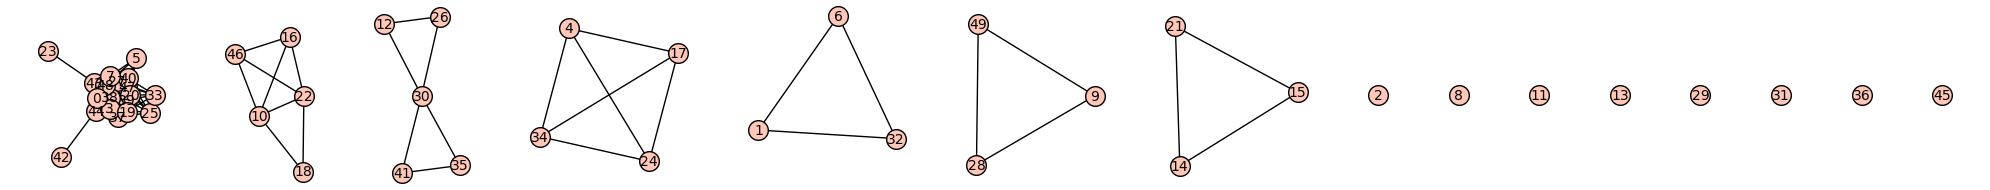

AP_Poll_2024_Week_13_agreement_graph


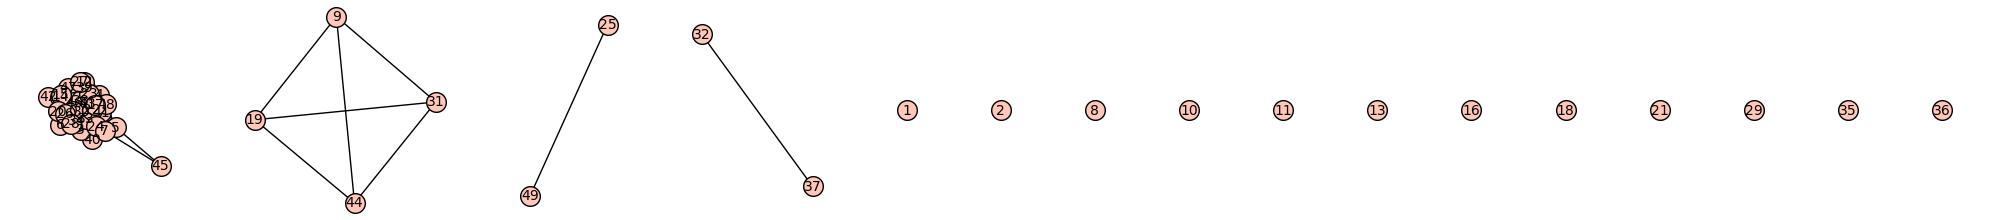

AP_Poll_2024_Week_14_agreement_graph


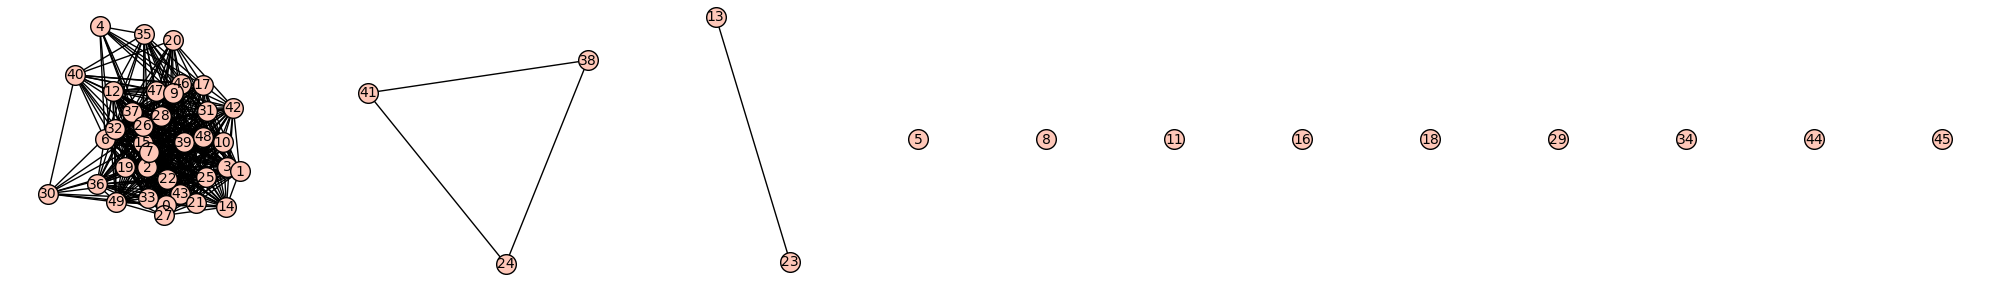

AP_Poll_2024_Week_15_agreement_graph


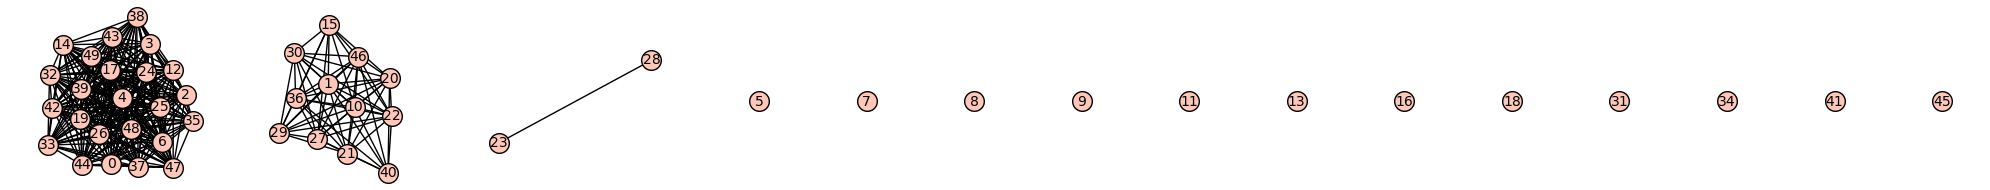

AP_Poll_2024_Week_16_agreement_graph


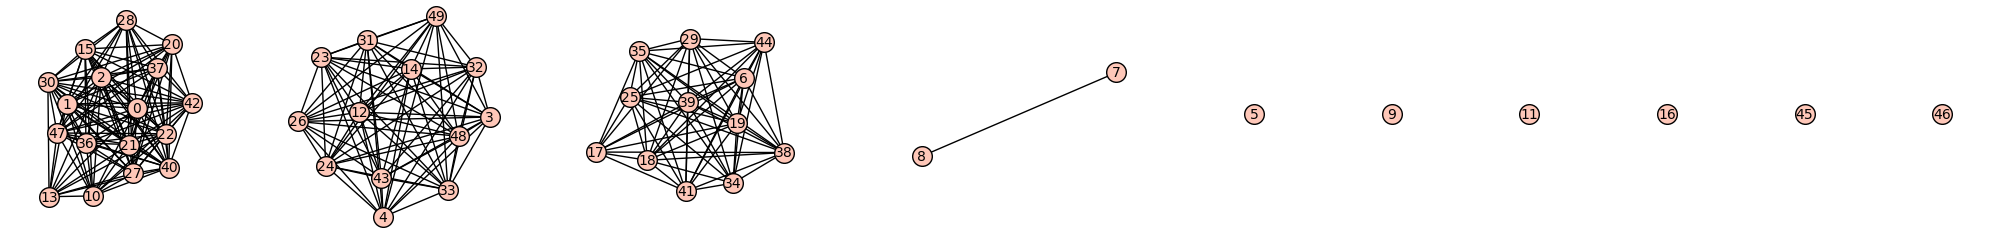

AP_Poll_2024_Final_agreement_graph


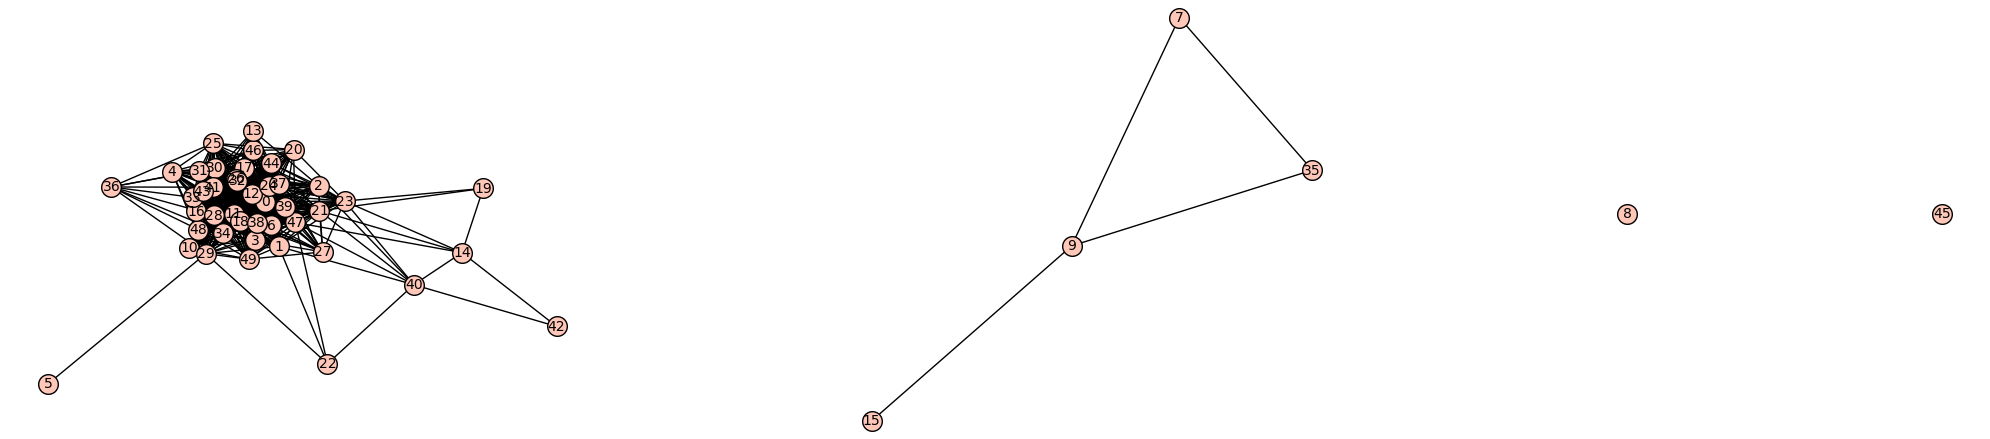

In [9]:
print('AP_Poll_2024_Preseason_agreement_graph')
AP_Poll_2024_Preseason_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_2_agreement_graph')
AP_Poll_2024_Week_2_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_3_agreement_graph')
AP_Poll_2024_Week_3_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_4_agreement_graph')
AP_Poll_2024_Week_4_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_5_agreement_graph')
AP_Poll_2024_Week_5_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_6_agreement_graph')
AP_Poll_2024_Week_6_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_7_agreement_graph')
AP_Poll_2024_Week_7_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_8_agreement_graph')
AP_Poll_2024_Week_8_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_9_agreement_graph')
AP_Poll_2024_Week_9_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_10_agreement_graph')
AP_Poll_2024_Week_10_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_11_agreement_graph')
AP_Poll_2024_Week_11_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_12_agreement_graph')
AP_Poll_2024_Week_12_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_13_agreement_graph')
AP_Poll_2024_Week_13_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_14_agreement_graph')
AP_Poll_2024_Week_14_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_15_agreement_graph')
AP_Poll_2024_Week_15_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Week_16_agreement_graph')
AP_Poll_2024_Week_16_agreement_graph.show(figsize=20)
print('AP_Poll_2024_Final_agreement_graph')
AP_Poll_2024_Final_agreement_graph.show(figsize=20)